In [2]:
import pandas as pd 
import numpy as np 
#from scikit

# Some visualization libraries
from matplotlib import pyplot as plt
import seaborn as sns

## Some other snippit of codes to get the setting right 
## This is so that the chart created by matplotlib can be shown in the jupyter notebook. 
%matplotlib inline 
%config InlineBackend.figure_format = 'retina' ## This is preferable for retina display. 
import warnings ## importing warnings library. 
warnings.filterwarnings('ignore') ## Ignore warning
import os ## imporing os

In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
## saving passenger id in advance in order to submit later. 
passengerid = test.PassengerId

print (train.info())
print ("*"*40)
print (test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
****************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pass

In [6]:
def missing_percentage(df):
    total= df.isnull().sum().sort_values(ascending=False)
    percent= round(total/len(df)*100,2)
    return pd.concat([total,percent], axis=1, keys=['Total','Percent'])

In [7]:
%timeit -r2 -n15 missing_percentage(train)

1.75 ms ± 66.1 µs per loop (mean ± std. dev. of 2 runs, 15 loops each)


In [8]:
missing_percentage(train)

,Total,Percent
Cabin,687,77.10
Age,177,19.87
Embarked,2,0.22
PassengerId,0,0.00
Survived,0,0.00
Pclass,0,0.00
Name,0,0.00
Sex,0,0.00
SibSp,0,0.00
Parch,0,0.00


In [9]:
%timeit -r2 -n15 missing_percentage(test)
missing_percentage(test)

1.64 ms ± 71.1 µs per loop (mean ± std. dev. of 2 runs, 15 loops each)


,Total,Percent
Cabin,327,78.23
Age,86,20.57
Fare,1,0.24
PassengerId,0,0.00
Pclass,0,0.00
Name,0,0.00
Sex,0,0.00
SibSp,0,0.00
Parch,0,0.00
Ticket,0,0.00


In [10]:
def percent_value_counts(df, feature):
    percent= pd.DataFrame(round((df.loc[:,feature].value_counts(dropna=False,normalize=True))*100,2))
    total= pd.DataFrame(df.loc[:,feature].value_counts(dropna=False))
    
    total.columns= ['Total']
    percent.columns= ['Percent']
    
    return pd.concat([total,percent],axis=1)

In [11]:
percent_value_counts(train,'Embarked')

,Total,Percent
S,644,72.28
C,168,18.86
Q,77,8.64
NaN,2,0.22


In [12]:
train[train.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


Text(0.5, 1.0, 'Test Set')

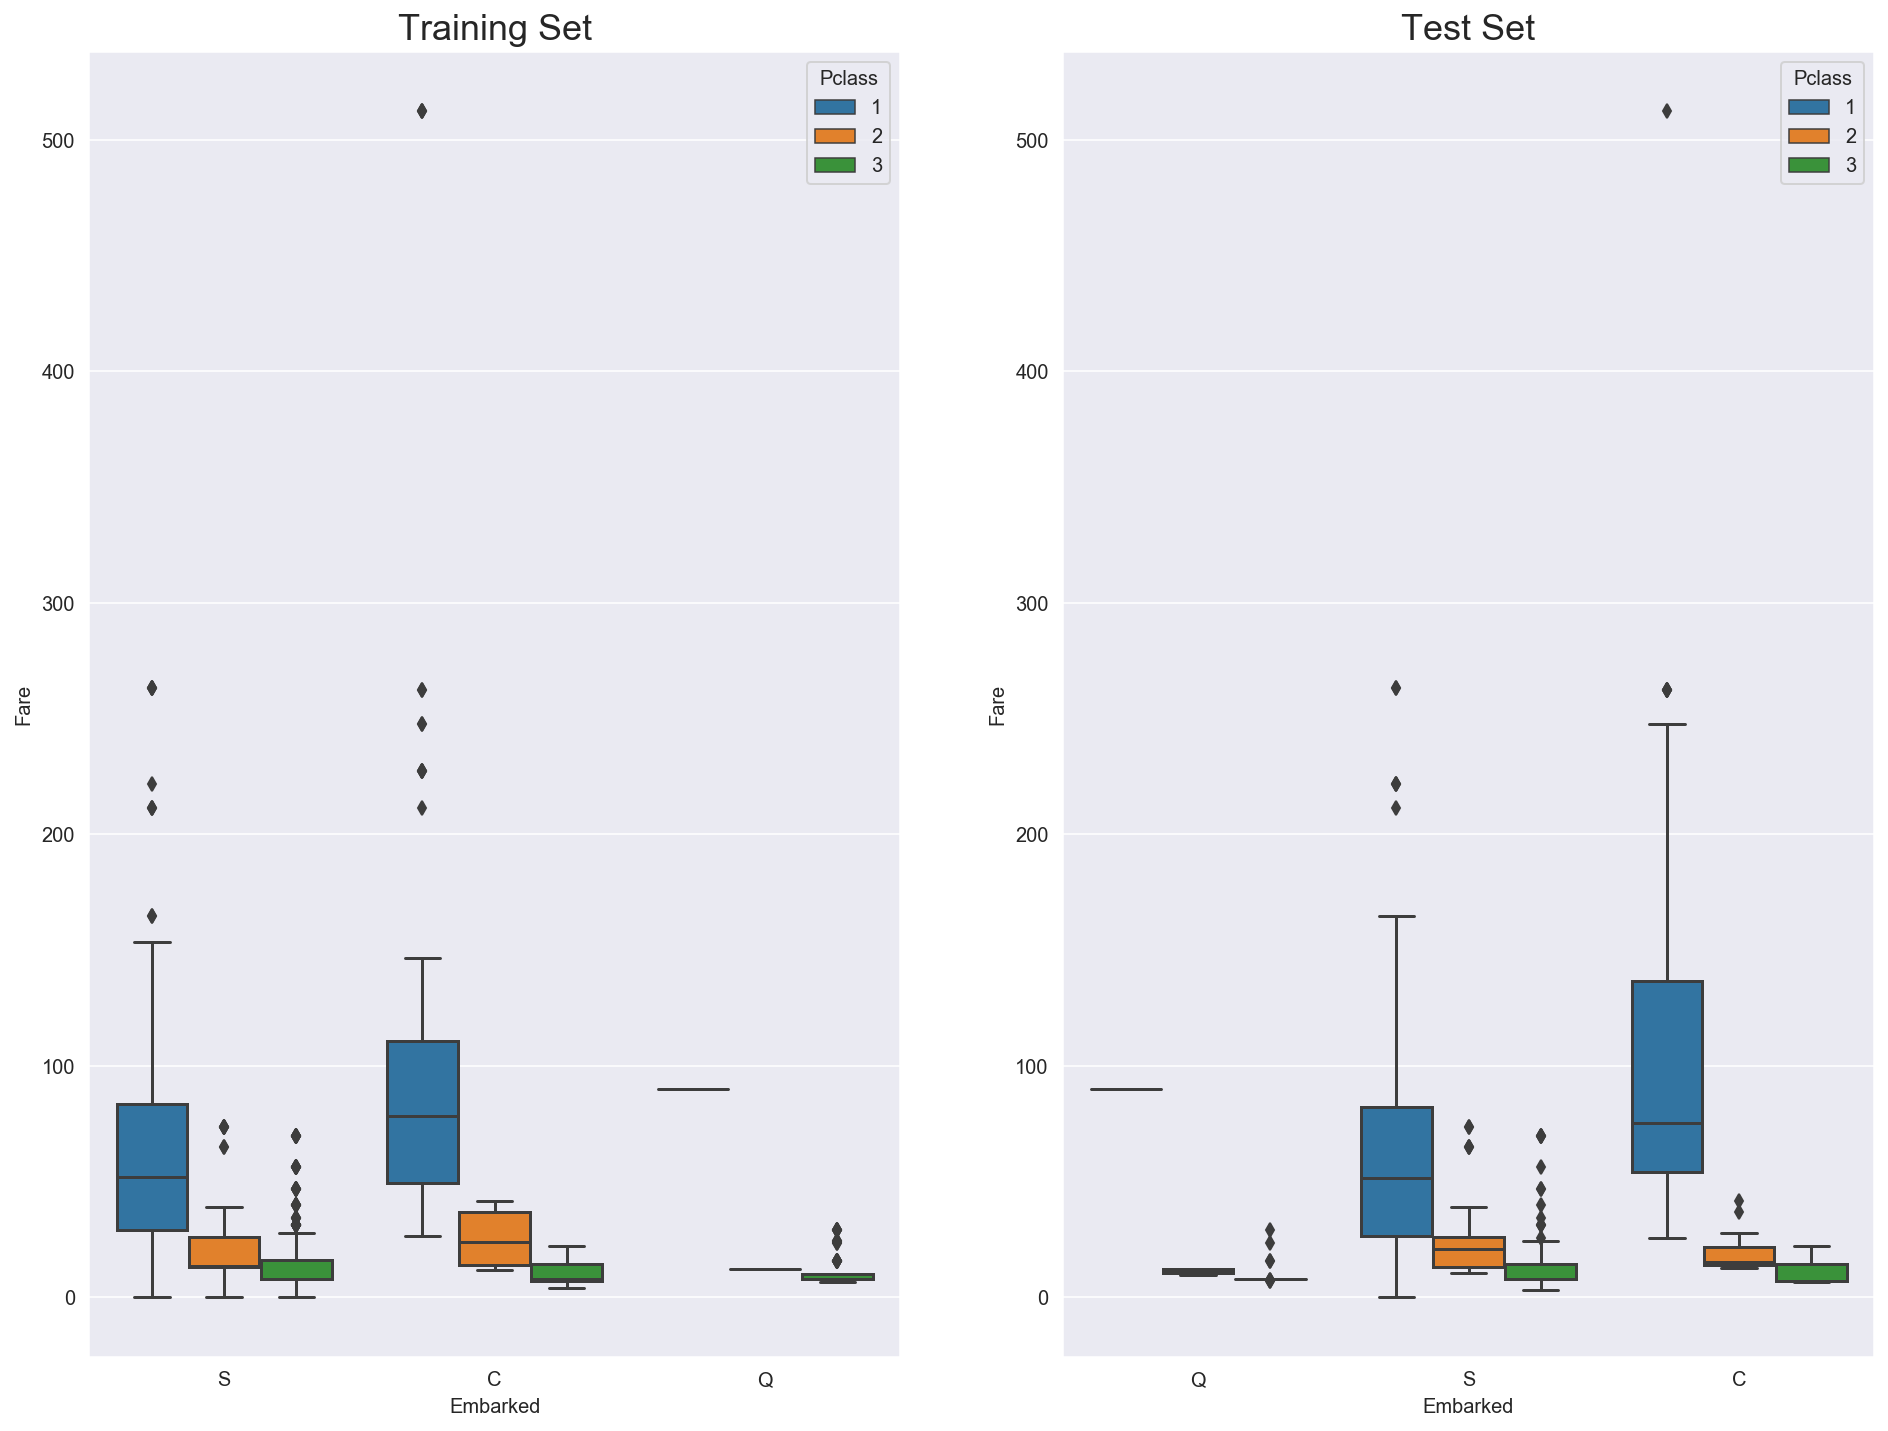

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')

fig,ax= plt.subplots(figsize=(16,12), ncols=2)

ax1= sns.boxplot(x='Embarked', y='Fare', hue='Pclass', data=train, ax=ax[0])
ax2= sns.boxplot(x='Embarked', y='Fare', hue='Pclass', data=test, ax=ax[1])

ax1.set_title("Training Set", fontsize=18)
ax2.set_title("Test Set", fontsize=18)

In [14]:
## Replacing the null values in the Embarked column with the mode.
train.Embarked.fillna("C",inplace=True)

In [15]:
#concating all the train and test data into a single variable 
#dropping survivors to match dimension

survivors=train.Survived
train.drop(['Survived'],axis=1,inplace=True)
all_data= pd.concat([train,test],ignore_index=False)
all_data.Cabin.fillna("N", inplace=True)


In [16]:
all_data.sample(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
570,571,2,"Harris, Mr. George",male,62.0,0,0,S.W./PP 752,10.5000,N,S
403,404,3,"Hakkarainen, Mr. Pekka Pietari",male,28.0,1,0,STON/O2. 3101279,15.8500,N,S
648,649,3,"Willey, Mr. Edward",male,NaN,0,0,S.O./P.P. 751,7.5500,N,S
174,1066,3,"Asplund, Mr. Carl Oscar Vilhelm Gustafsson",male,40.0,1,5,347077,31.3875,N,S
269,1161,3,"Pokrnic, Mr. Mate",male,17.0,0,0,315095,8.6625,N,S
213,214,2,"Givard, Mr. Hans Kristensen",male,30.0,0,0,250646,13.0000,N,S
251,252,3,"Strom, Mrs. Wilhelm (Elna Matilda Persson)",female,29.0,1,1,347054,10.4625,G6,S
819,820,3,"Skoog, Master. Karl Thorsten",male,10.0,3,2,347088,27.9000,N,S
272,1164,1,"Clark, Mrs. Walter Miller (Virginia McDowell)",female,26.0,1,0,13508,136.7792,C89,C
375,376,1,"Meyer, Mrs. Edgar Joseph (Leila Saks)",female,NaN,1,0,PC 17604,82.1708,N,C


In [17]:
all_data.Cabin = [i[0] for i in all_data.Cabin]

In [18]:
percent_value_counts(all_data,'Cabin')

,Total,Percent
N,1014,77.46
C,94,7.18
B,65,4.97
D,46,3.51
E,41,3.13
A,22,1.68
F,21,1.60
G,5,0.38
T,1,0.08


In [19]:
#calculating mean fare of each cabin
all_data.groupby("Cabin")['Fare'].mean().sort_values()

Cabin
G     14.205000
F     18.079367
N     19.132707
T     35.500000
A     41.244314
D     53.007339
E     54.564634
C    107.926598
B    122.383078
Name: Fare, dtype: float64

In [20]:
def cabin_estimator(i):
    """grouping cabin feature by the first letter"""
    a = 0
    if i<16:
        a = "G"
    elif i>=16 and i<27:
        a = "F"
    elif i>=27 and i<38:
        a = "T"
    elif i>=38 and i<47:
        a = "A"
    elif i>=47 and i<53:
        a = "D"
    elif i>=53 and i<54:
        a = "E"
    elif i>=54 and i<116:
        a = "C"
    else:
        a= "B"
    return a     
            

In [21]:
with_N= all_data[all_data.Cabin == "N"]

without_N= all_data[all_data.Cabin != "N"]

In [22]:
with_N.sample(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
642,643,3,"Skoog, Miss. Margit Elizabeth",female,2.0,3,2,347088,27.9000,N,S
629,630,3,"O'Connell, Mr. Patrick D",male,NaN,0,0,334912,7.7333,N,Q
874,875,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,N,C
18,910,3,"Ilmakangas, Miss. Ida Livija",female,27.0,1,0,STON/O2. 3101270,7.9250,N,S
409,1301,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,N,S
80,972,3,"Boulos, Master. Akar",male,6.0,1,1,2678,15.2458,N,C
125,1017,3,"Cribb, Miss. Laura Alice",female,17.0,0,1,371362,16.1000,N,S
733,734,2,"Berriman, Mr. William John",male,23.0,0,0,28425,13.0000,N,S
173,1065,3,"Torfa, Mr. Assad",male,NaN,0,0,2673,7.2292,N,C
126,127,3,"McMahon, Mr. Martin",male,NaN,0,0,370372,7.7500,N,Q


In [23]:
#applying cabin estimator function
with_N["Cabin"] = with_N.Fare.apply(lambda x : cabin_estimator(x))

#getting back training data
all_data= pd.concat([with_N, without_N], axis=0)

#sort using passengerid
all_data.sort_values(by="PassengerId",inplace= True)

#passengerid helps separate train and test data
train = all_data[:891]
test = all_data[891:]

train["Survived"]=survivors

In [24]:
print (test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        418 non-null    object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 39.2+ KB
None


In [25]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        891 non-null    object 
 10  Embarked     891 non-null    object 
 11  Survived     891 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB
None


In [26]:
test[test.Fare.isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,B,S


In [27]:
missing_value = test[(test.Pclass==3) & (test.Embarked=="S") & (test.Sex=="male")].Fare.mean()

test.Fare.fillna(missing_value, inplace=True)

In [28]:
missing_percentage(train)

,Total,Percent
Age,177,19.87
PassengerId,0,0.00
Pclass,0,0.00
Name,0,0.00
Sex,0,0.00
SibSp,0,0.00
Parch,0,0.00
Ticket,0,0.00
Fare,0,0.00
Cabin,0,0.00


In [29]:
missing_percentage(test)

,Total,Percent
Age,86,20.57
PassengerId,0,0.00
Pclass,0,0.00
Name,0,0.00
Sex,0,0.00
SibSp,0,0.00
Parch,0,0.00
Ticket,0,0.00
Fare,0,0.00
Cabin,0,0.00


Text(0.5, 0, 'Sex')

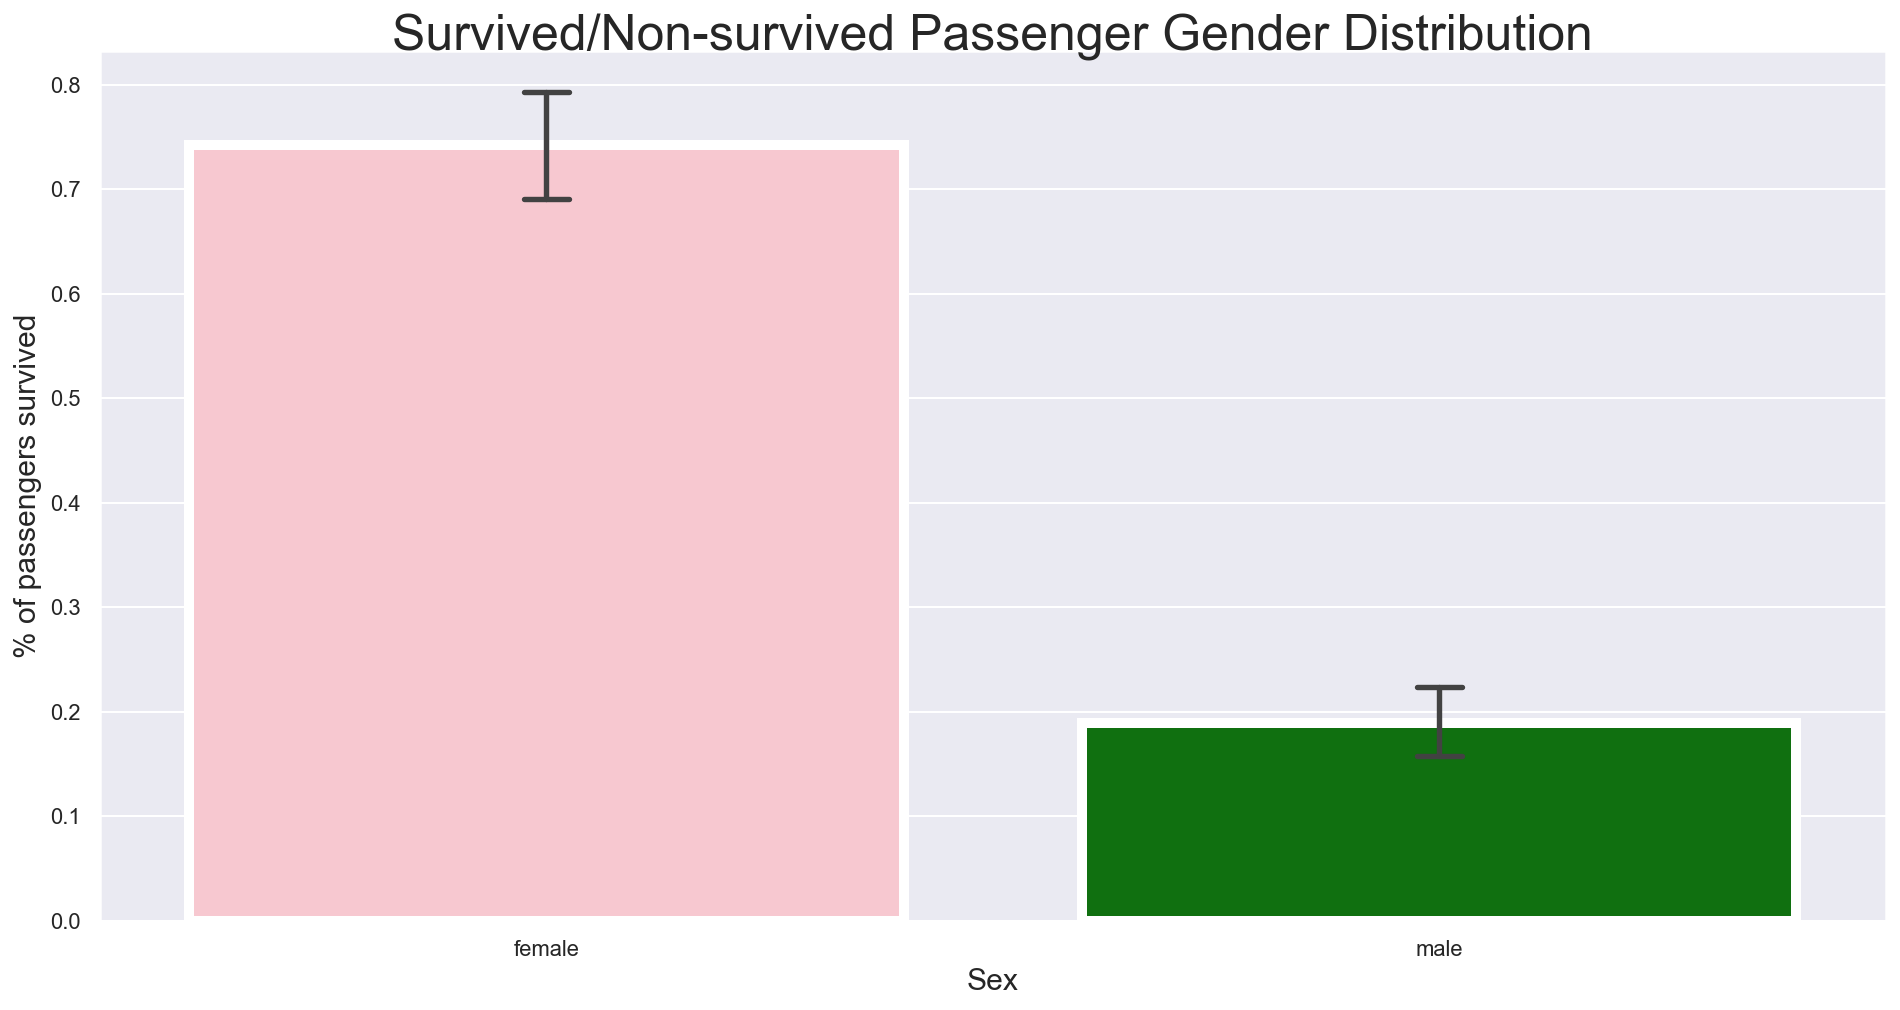

In [30]:
import seaborn as sns
pal= {'male':"Green", 'female':"Pink"}
sns.set(style="darkgrid")
plt.subplots(figsize=[16,8])
ax = sns.barplot(x = "Sex",
                 y = "Survived",
                 data = train,
                 palette = pal,
                 linewidth = 5,
                 order = ["female", "male"],
                 capsize = 0.05
                )

plt.title("Survived/Non-survived Passenger Gender Distribution", fontsize=25, loc='center', pad= 0)
plt.ylabel("% of passengers survived", fontsize=15)
plt.xlabel('Sex', fontsize=15)

                 


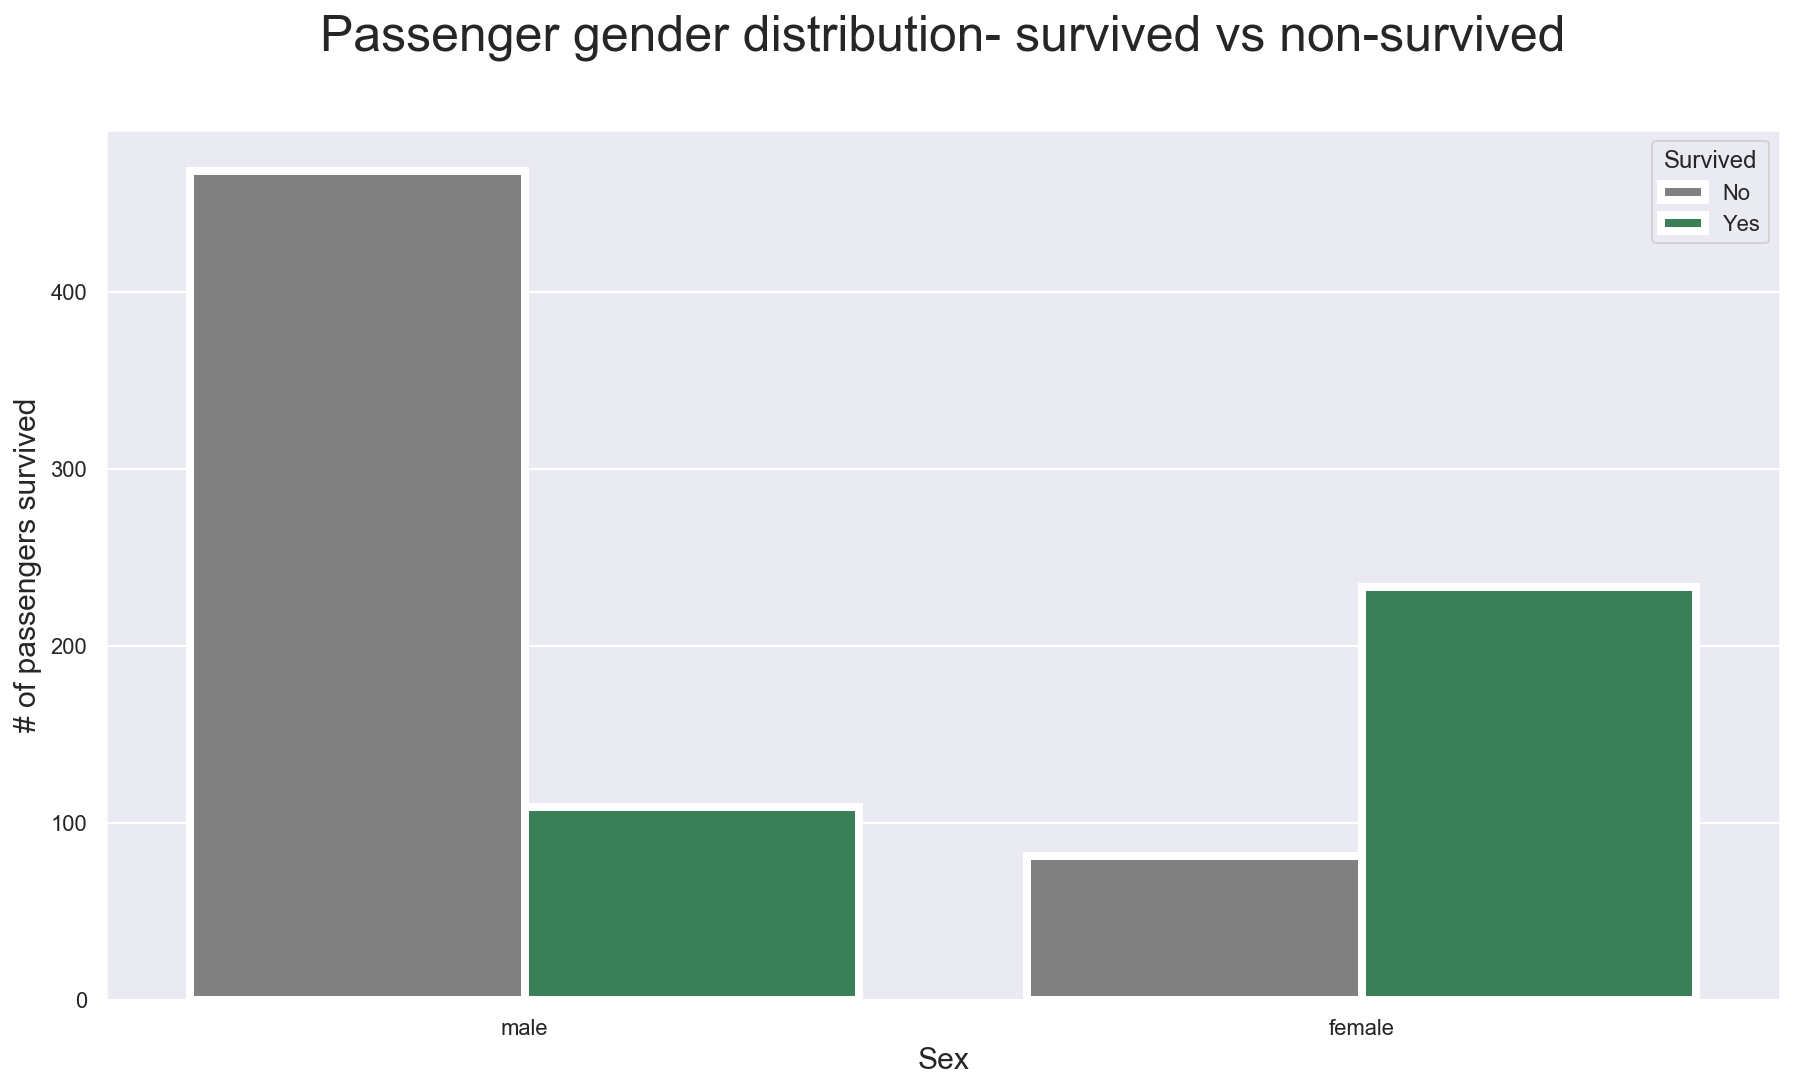

In [31]:
pal = {1:"seagreen", 0:"gray"}
sns.set(style="darkgrid")
plt.subplots(figsize= (15,8))
ax = sns.countplot(x="Sex", hue="Survived", data=train, linewidth=4, palette=pal)

#fixing x-label y-label and title

plt.title("Passenger gender distribution- survived vs non-survived", fontsize=25, pad=40)
plt.ylabel("# of passengers survived", fontsize=15)
plt.xlabel("Sex", fontsize=15)

#fixing legends
leg = ax.get_legend()
leg.set_title("Survived")
legs = leg.texts
legs[0].set_text("No")
legs[1].set_text("Yes")
plt.show()

Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119
         No  Yes
Pclass          
1        80  136
2        97   87
3       372  119
[216, 184, 491]
[37.03703703703704, 52.71739130434783, 75.76374745417516]


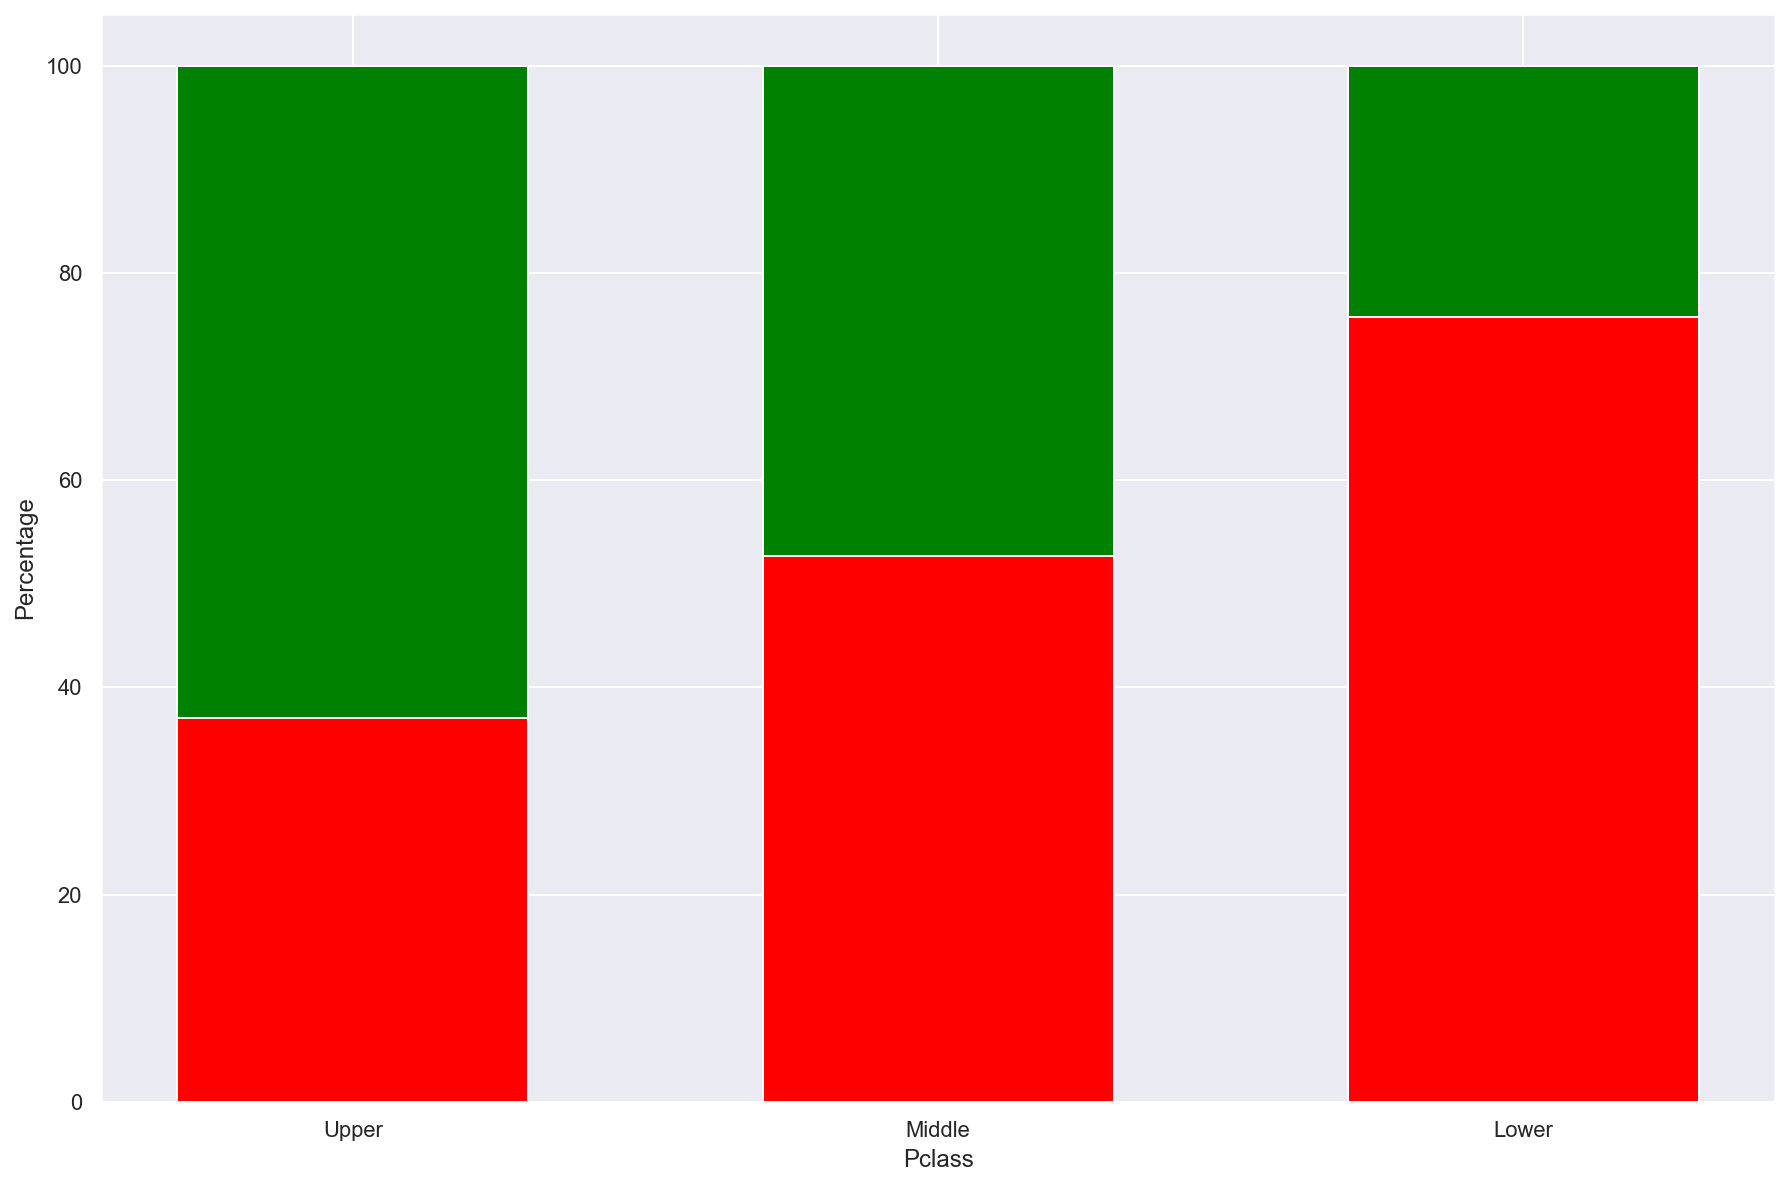

In [32]:
temp= train[['Pclass','Survived','PassengerId']].groupby(['Pclass','Survived']).count().reset_index()
temp_df= pd.pivot_table(temp, values='PassengerId', index='Pclass', columns='Survived')
print(temp_df)
names= ["No","Yes"]
temp_df.columns= names
print(temp_df)
r=[0,1,2]
totals = [i+j for i,j in zip(temp_df['No'], temp_df['Yes'])]
print(totals)
No_s = [i/j*100 for i,j in zip(temp_df['No'], totals)]
Yes_s = [i/j*100 for i,j in zip(temp_df['Yes'], totals)]
print(No_s)

#plotting
plt.subplots(figsize=(15,10))
barWidth = 0.6
names = ("Upper","Middle","Lower")

#create red bars
plt.bar(r, No_s, color='Red', edgecolor='white', width=barWidth)
#create green bars
plt.bar(r, Yes_s, bottom= No_s, color='Green', edgecolor='white', width=barWidth)

#custom x axis
plt.xticks(r, names)
plt.xlabel("Pclass")
plt.ylabel('Percentage')

#show graphic
plt.show()



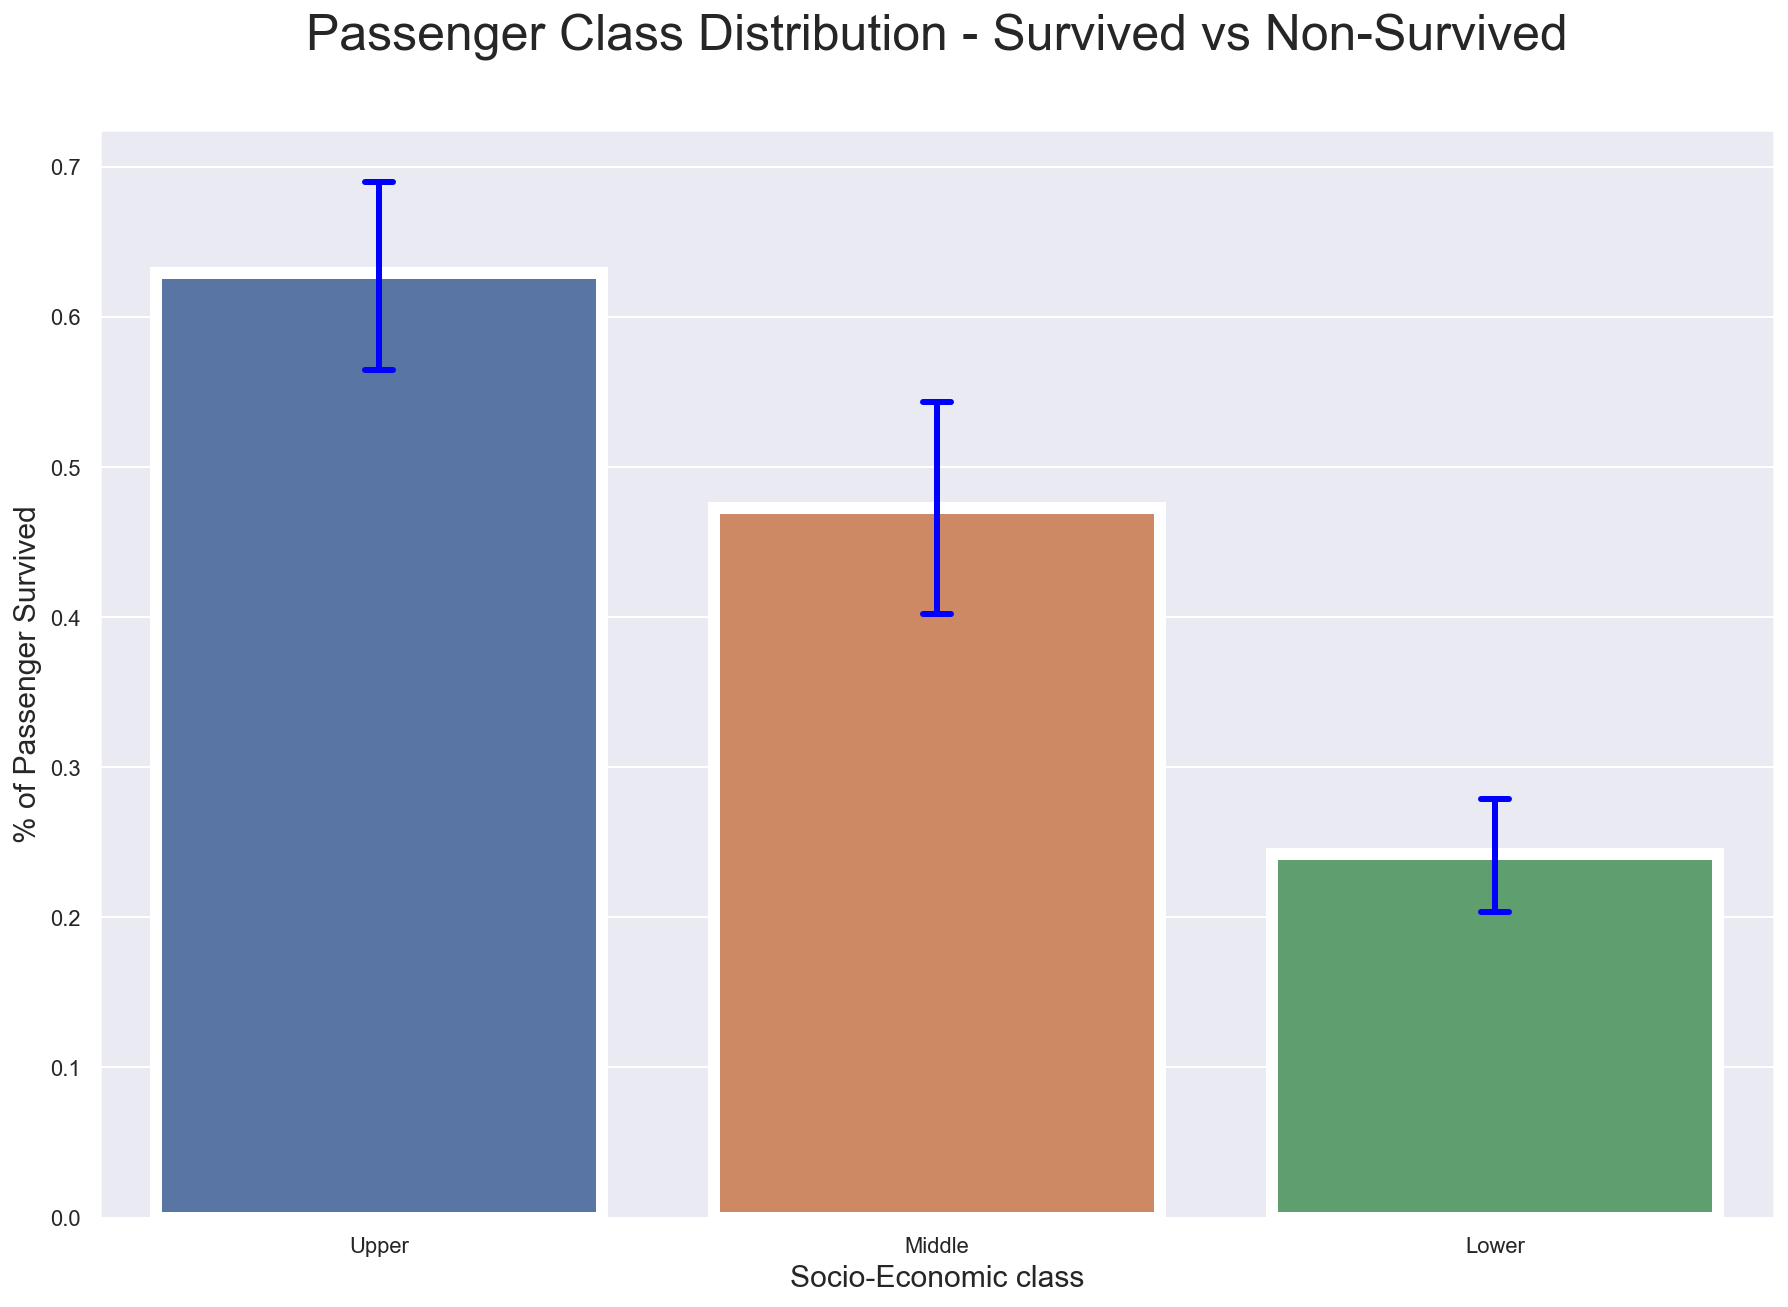

In [33]:
plt.subplots(figsize=(15,10))
sns.barplot(x="Pclass", y="Survived", data=train, linewidth=6, capsize=.05, errcolor='blue', errwidth=3)

plt.title("Passenger Class Distribution - Survived vs Non-Survived", fontsize = 25, pad=40)
plt.xlabel("Socio-Economic class", fontsize = 15);
plt.ylabel("% of Passenger Survived", fontsize = 15);
names = ['Upper', 'Middle', 'Lower']
#val = sorted(train.Pclass.unique())
val = [0,1,2] ## this is just a temporary trick to get the label right. 
plt.xticks(val, names);


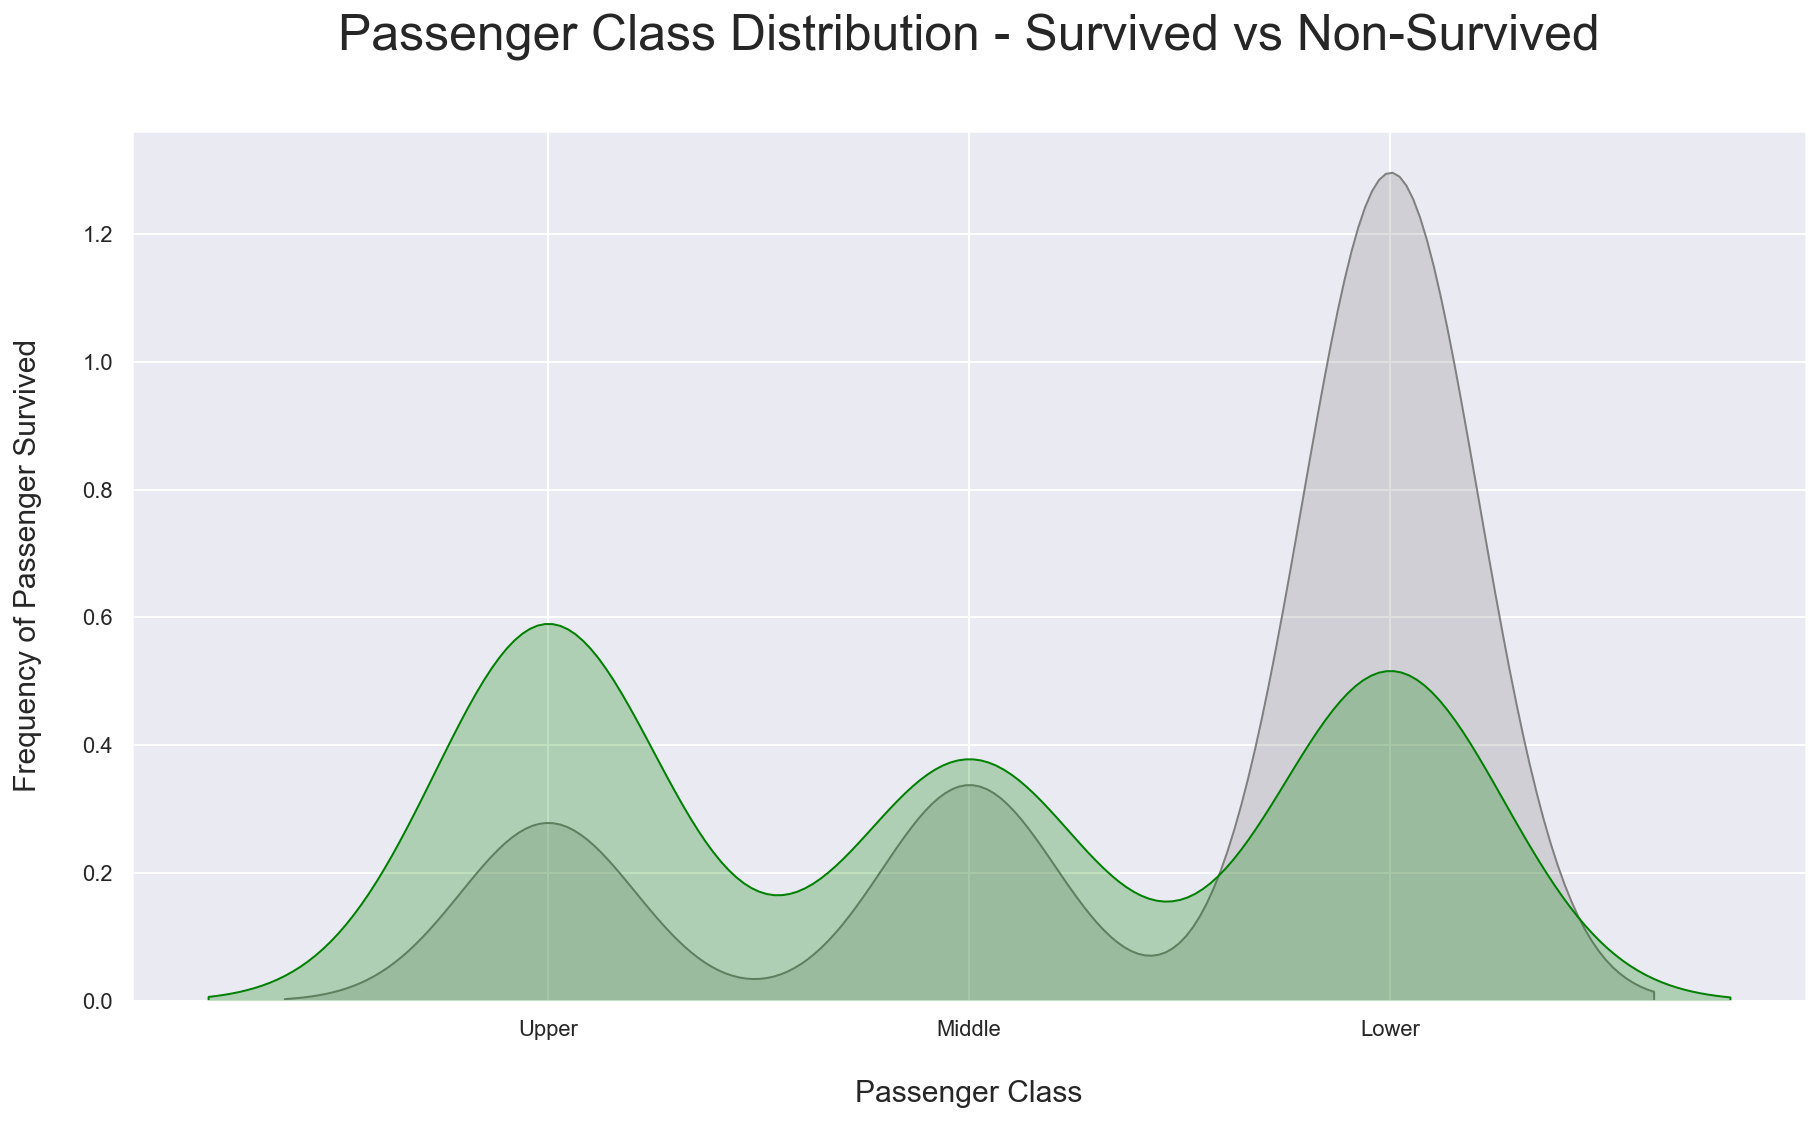

In [34]:
fig = plt.figure(figsize=(15,8))
ax= sns.kdeplot(train.Pclass[train.Survived==0], 
                color='gray',
                shade=True,
                label='not survived'
               )

ax= sns.kdeplot(train.Pclass[train.Survived==1],
               color='green',
               shade=True,
               label='survived'
               )

plt.title('Passenger Class Distribution - Survived vs Non-Survived', fontsize = 25, pad = 40)
plt.ylabel("Frequency of Passenger Survived", fontsize = 15, labelpad = 20)
plt.xlabel("Passenger Class", fontsize = 15,labelpad =20)
#converting xticks to labels for better understanding
labels=['Upper','Middle','Lower']
plt.xticks(sorted(train.Pclass.unique()),labels);


Text(0.5, 0, 'Fare')

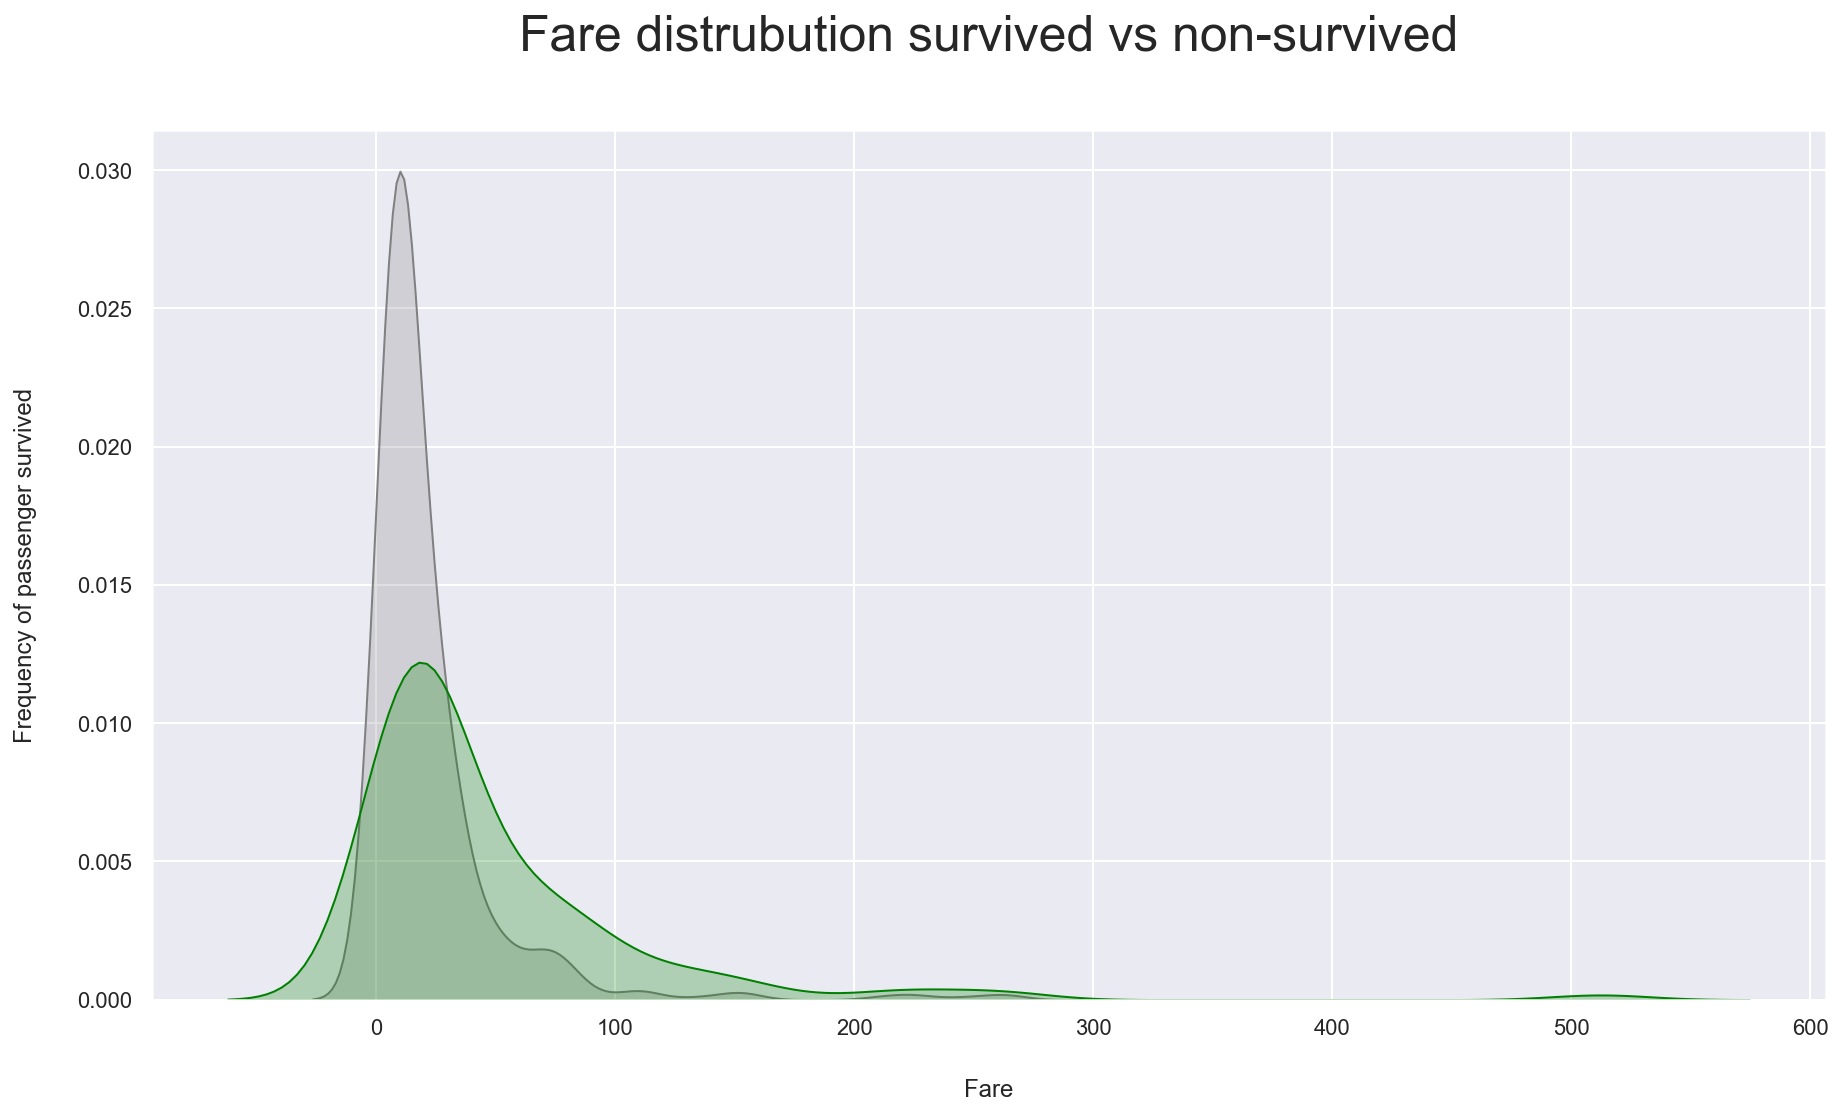

In [35]:
###     Fare and survived #######
fig=plt.figure(figsize=(15,8))
ax = sns.kdeplot(train.loc[(train['Survived']==0),'Fare'], 
                    color = 'Gray',
                    shade = True,
                    label = 'not survived'
                )

ax = sns.kdeplot(train.loc[(train['Survived']==1), 'Fare'],
                color = 'Green',
                shade = True,
                label = 'survived'
                )

plt.title('Fare distrubution survived vs non-survived',fontsize=25, pad=40)
plt.ylabel('Frequency of passenger survived',fontsize=12, labelpad=20)
plt.xlabel('Fare',fontsize=12, labelpad=20)


Text(0.5, 0, 'Age')

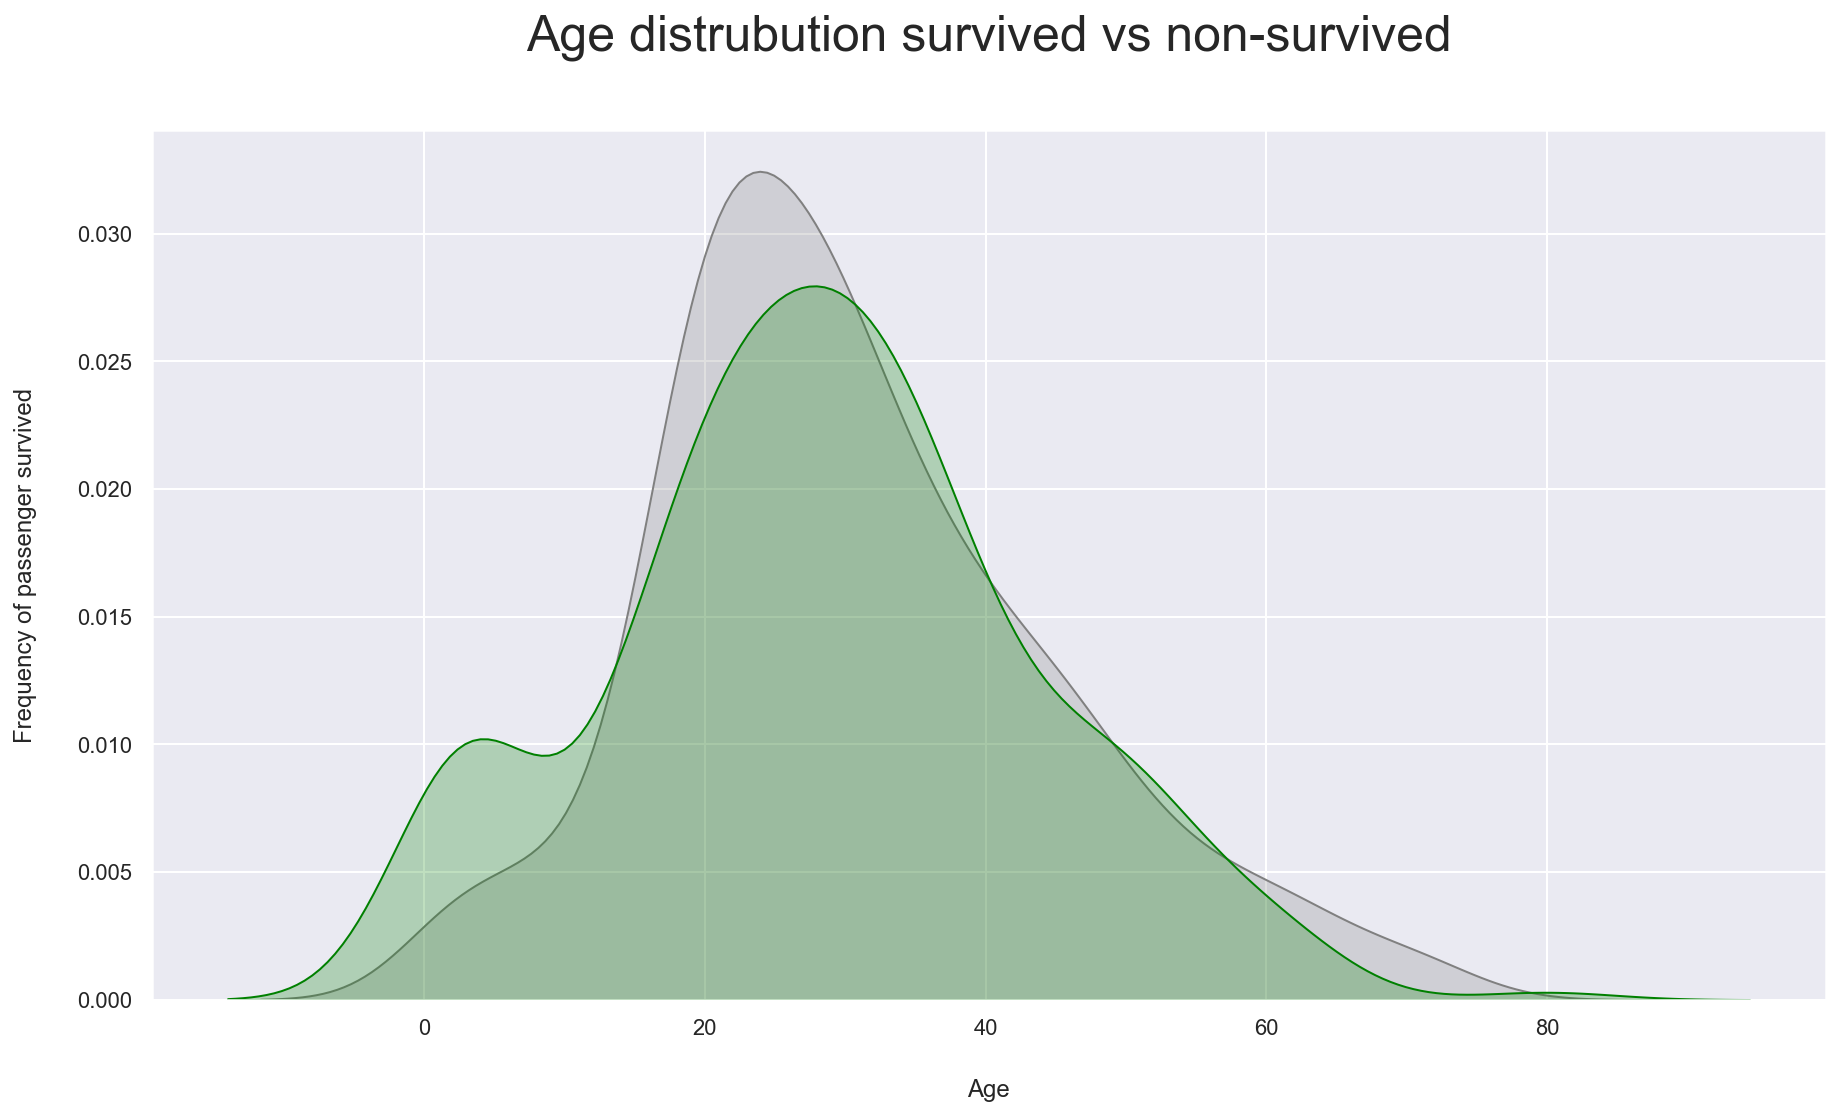

In [36]:
###     AGE and survived #######
fig=plt.figure(figsize=(15,8))
ax = sns.kdeplot(train.loc[(train['Survived']==0),'Age'], 
                    color = 'Gray',
                    shade = True,
                    label = 'not survived'
                )

ax = sns.kdeplot(train.loc[(train['Survived']==1), 'Age'],
                color = 'Green',
                shade = True,
                label = 'survived'
                )

plt.title('Age distrubution survived vs non-survived',fontsize=25, pad=40)
plt.ylabel('Frequency of passenger survived',fontsize=12, labelpad=20);
plt.xlabel('Age',fontsize=12, labelpad=20)


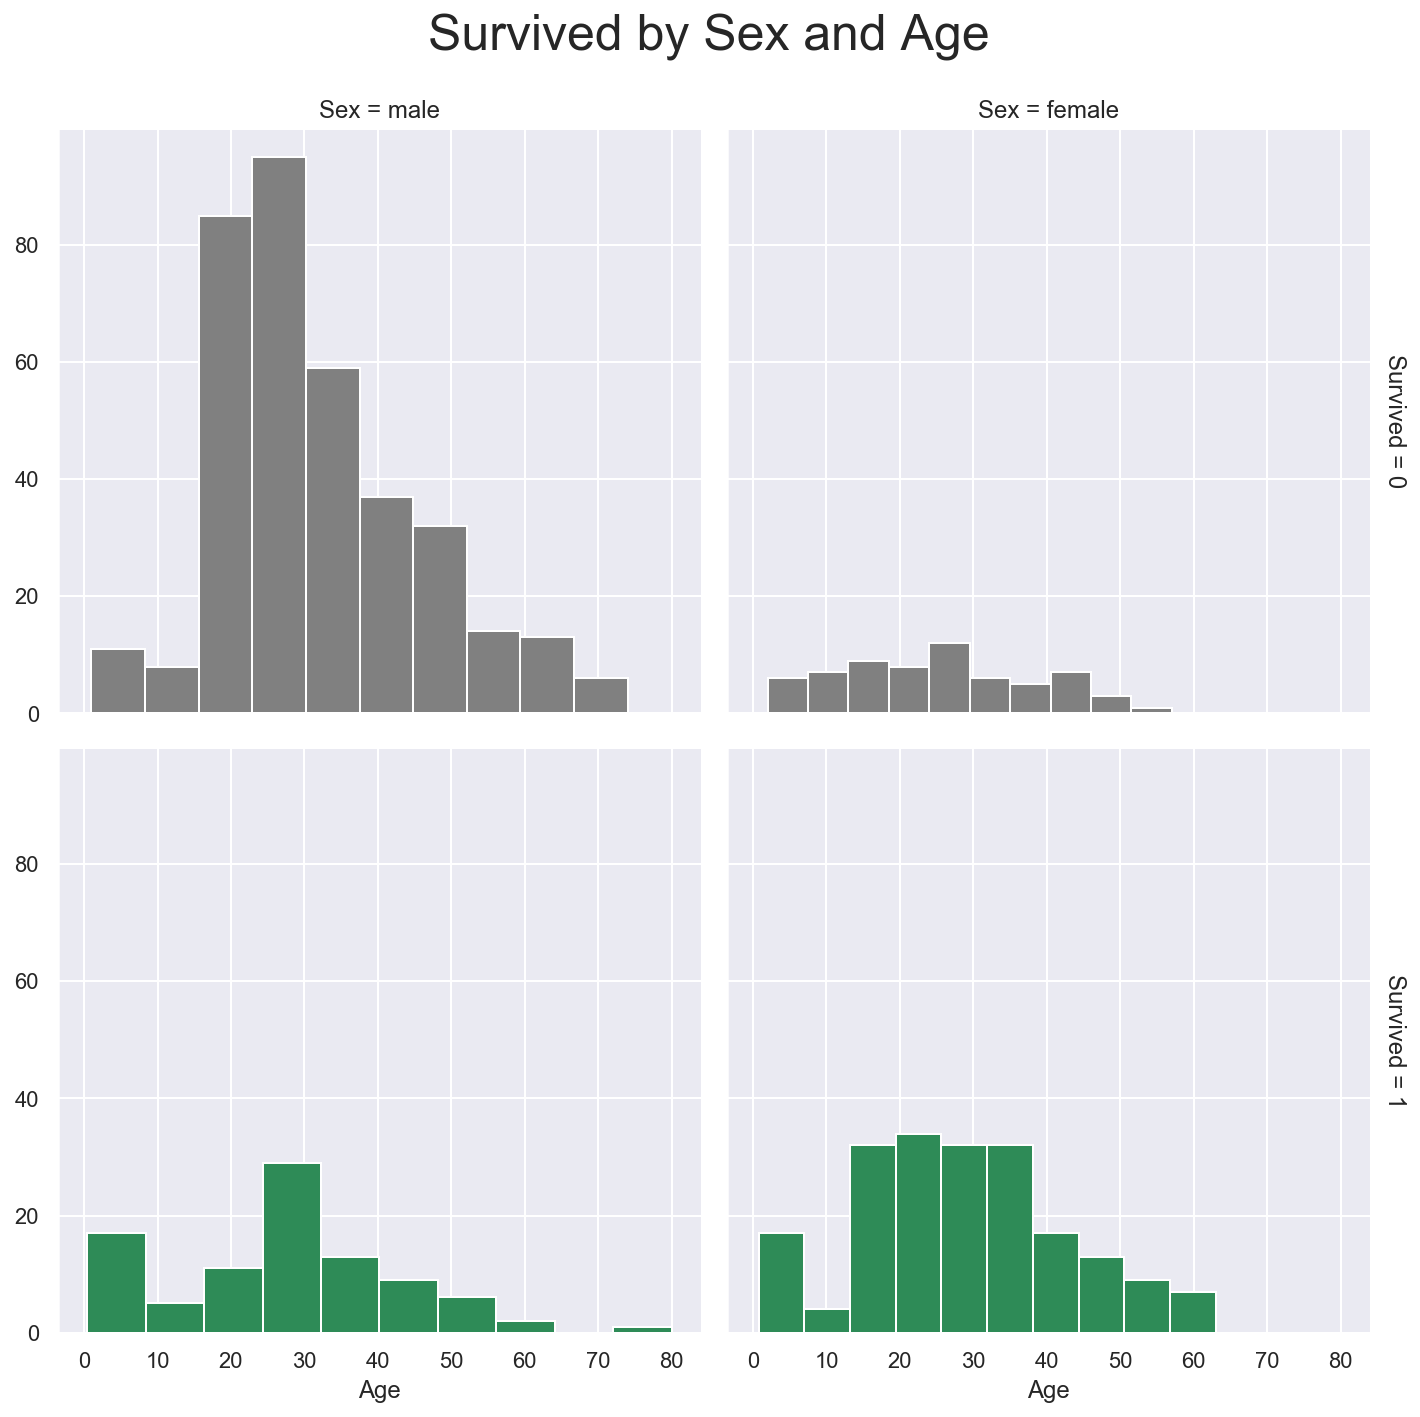

In [37]:
#visualize survived by age and sex (combined feature relation)

pal = {1:"seagreen", 0:"gray"}
g = sns.FacetGrid(train,size=5, col="Sex", row="Survived", margin_titles=True, hue = "Survived",
                  palette=pal)
g = g.map(plt.hist, "Age", edgecolor = 'white');
g.fig.suptitle("Survived by Sex and Age", size = 25)
plt.subplots_adjust(top=0.90)

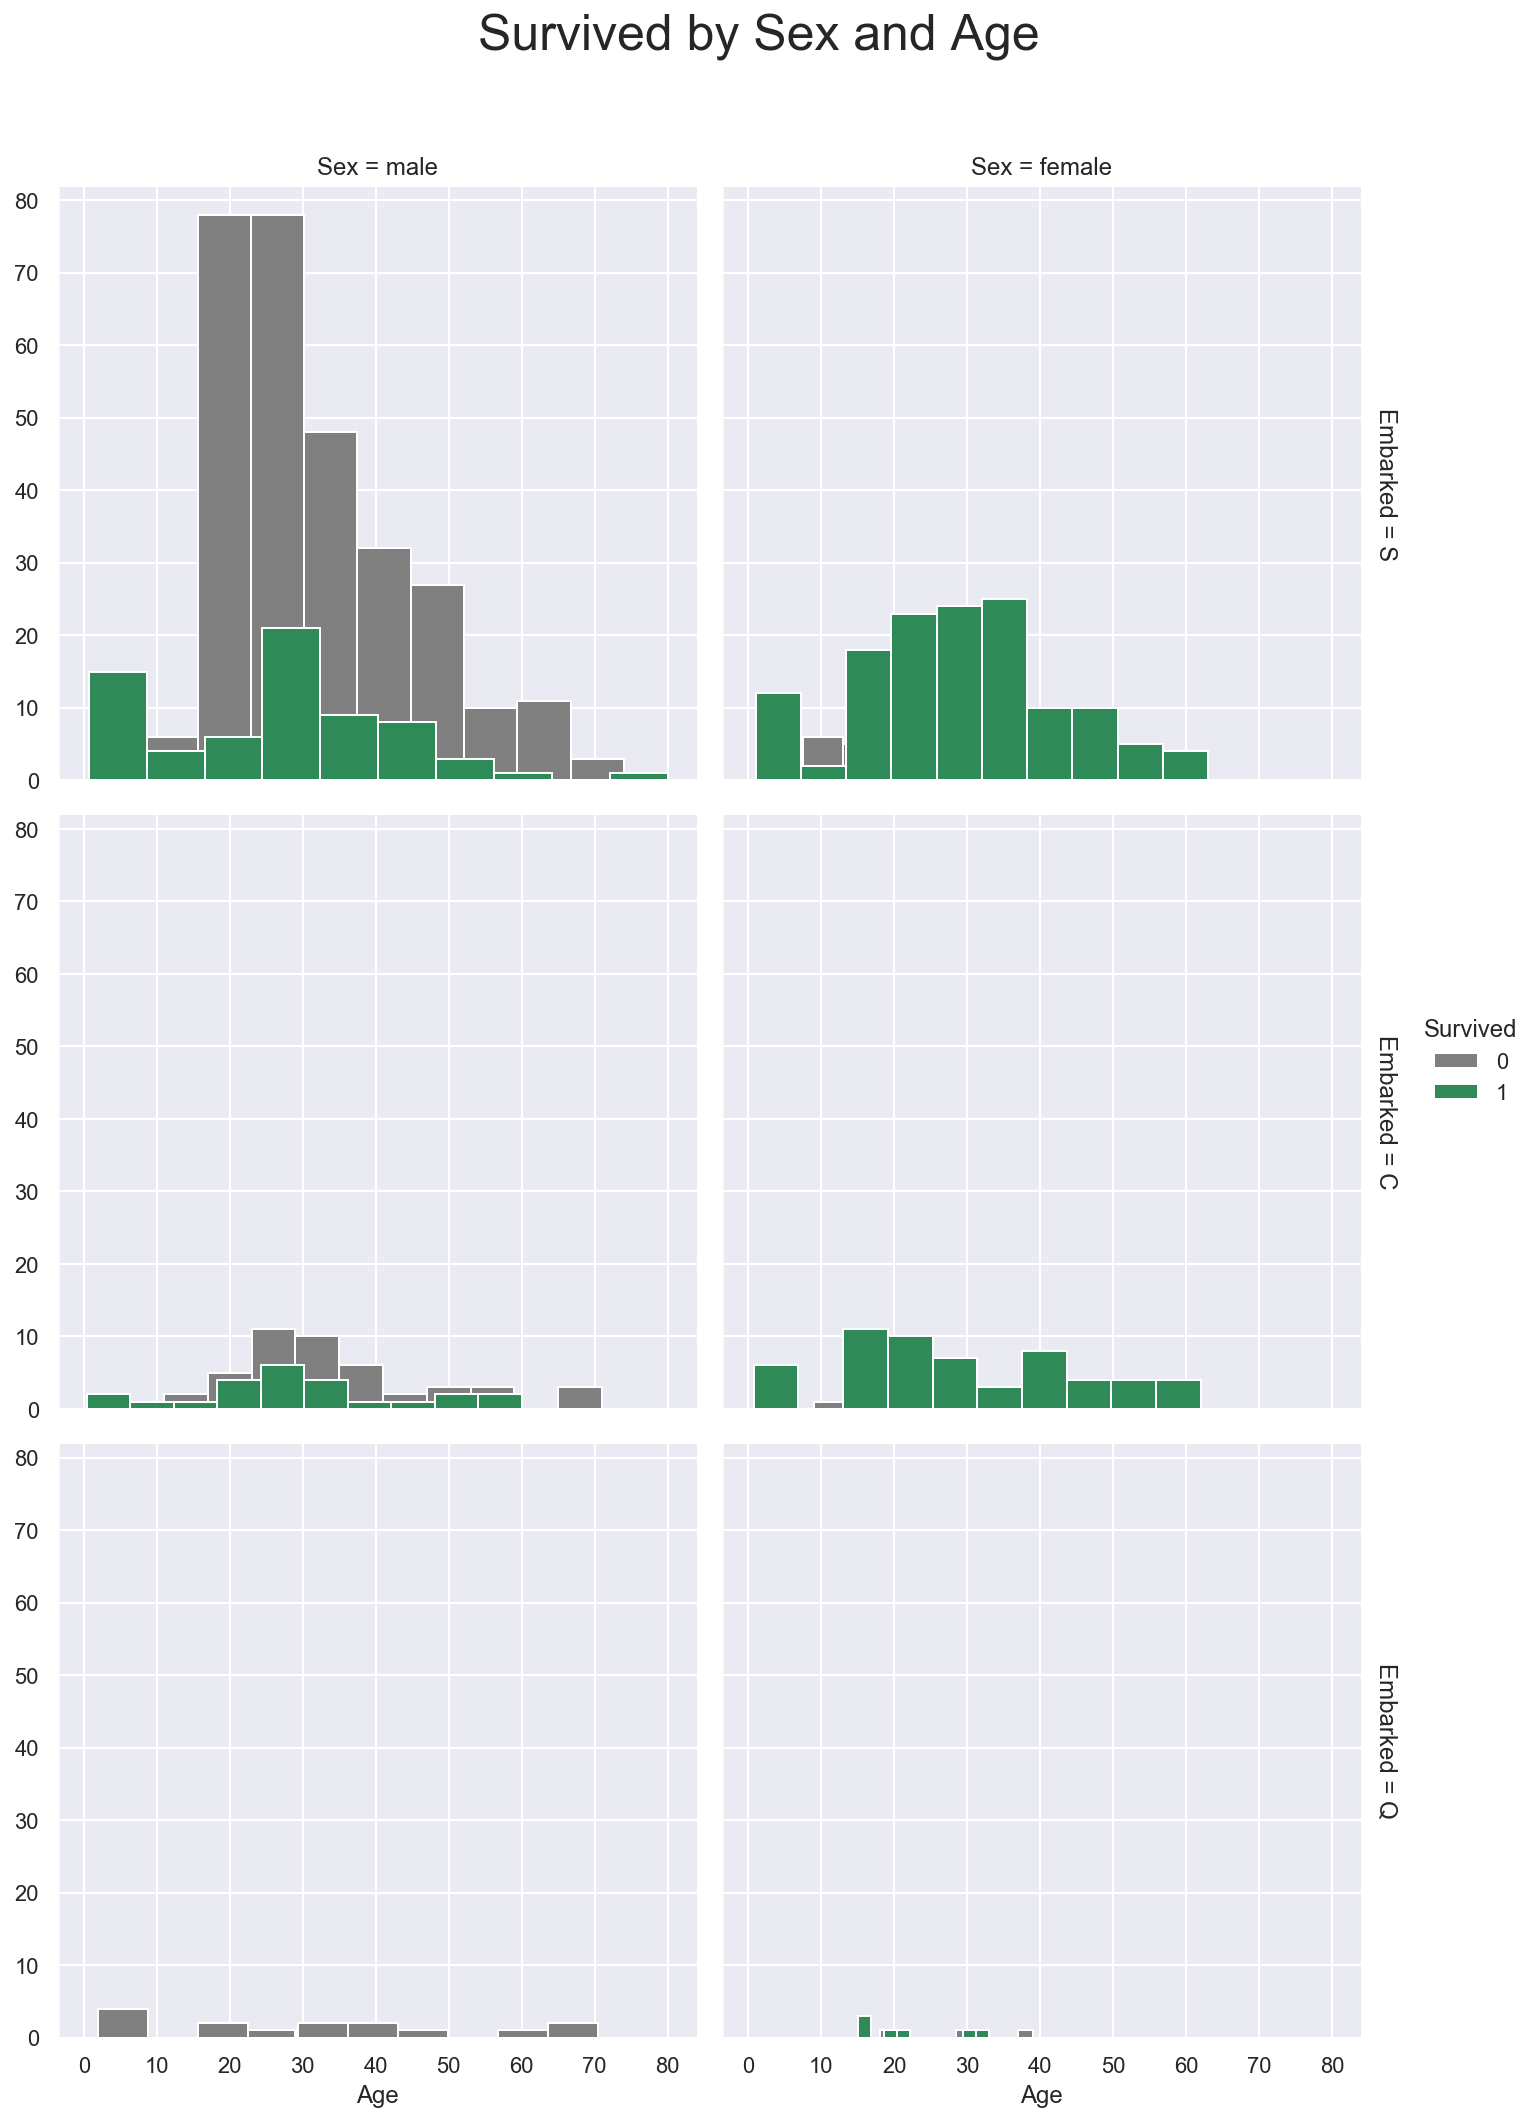

In [38]:
#visualize survived by embarked, age and sex

g = sns.FacetGrid(train,size=5, col="Sex", row="Embarked", margin_titles=True, hue = "Survived",
                  palette=pal)
g = g.map(plt.hist, "Age", edgecolor = 'white').add_legend();
g.fig.suptitle("Survived by Sex and Age", size = 25)
plt.subplots_adjust(top=0.90)


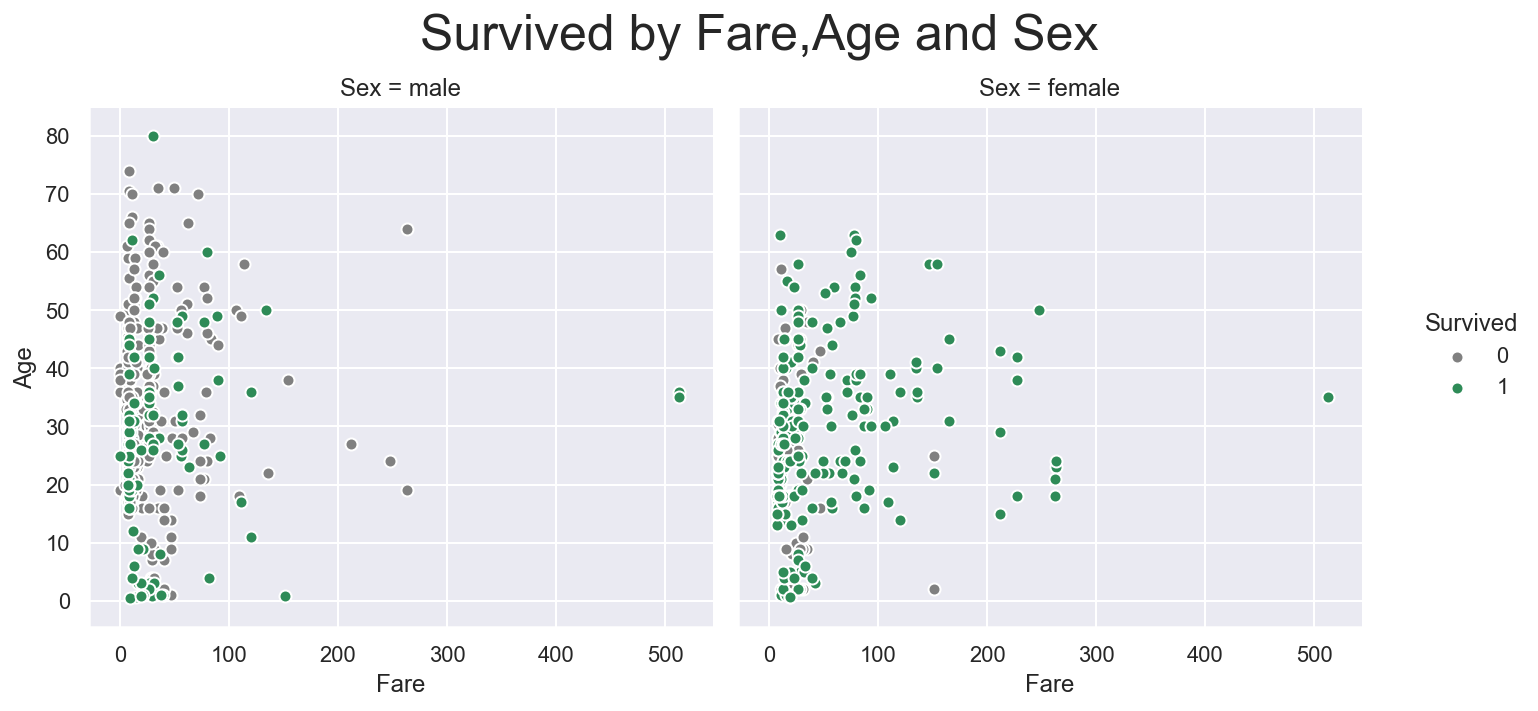

In [39]:
# survived by fare, age and sex

g = sns.FacetGrid(train, size=5,hue="Survived", col ="Sex", margin_titles=True,
                    palette=pal)
g.map(plt.scatter, "Fare", "Age", edgecolor="w").add_legend()
g.fig.suptitle("Survived by Fare,Age and Sex", size=25)
plt.subplots_adjust(top=0.85)


In [40]:
train[train.Fare > 280]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
258,259,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,B,C,1
679,680,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B,C,1
737,738,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B,C,1


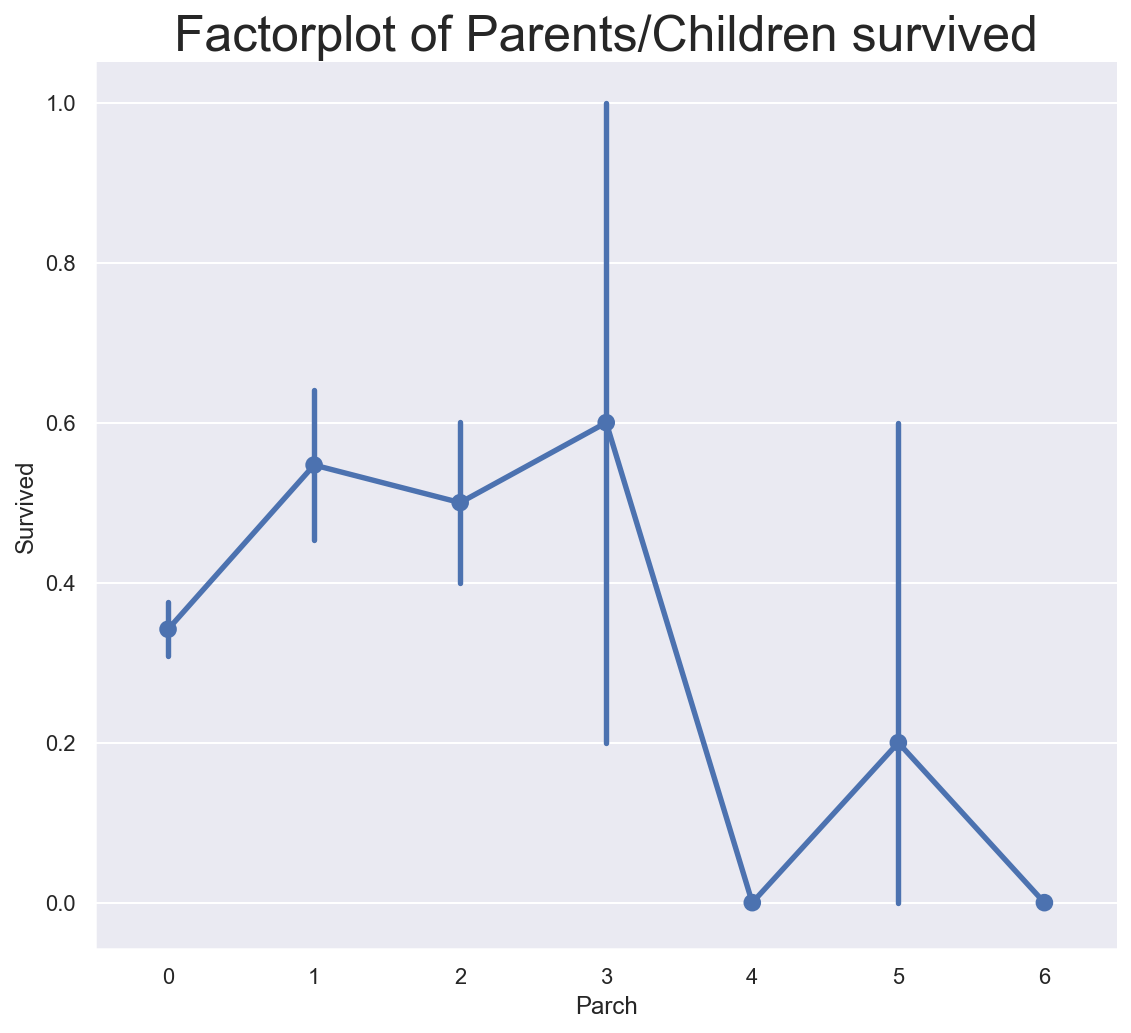

In [41]:
## dropping the three outliers where Fare is over $500 
train = train[train.Fare < 500]
## factor plot of parent child survived
sns.factorplot(x = "Parch", y = "Survived", data = train,kind = "point",size = 8)
plt.title("Factorplot of Parents/Children survived", fontsize = 25)
plt.subplots_adjust(top=0.85)

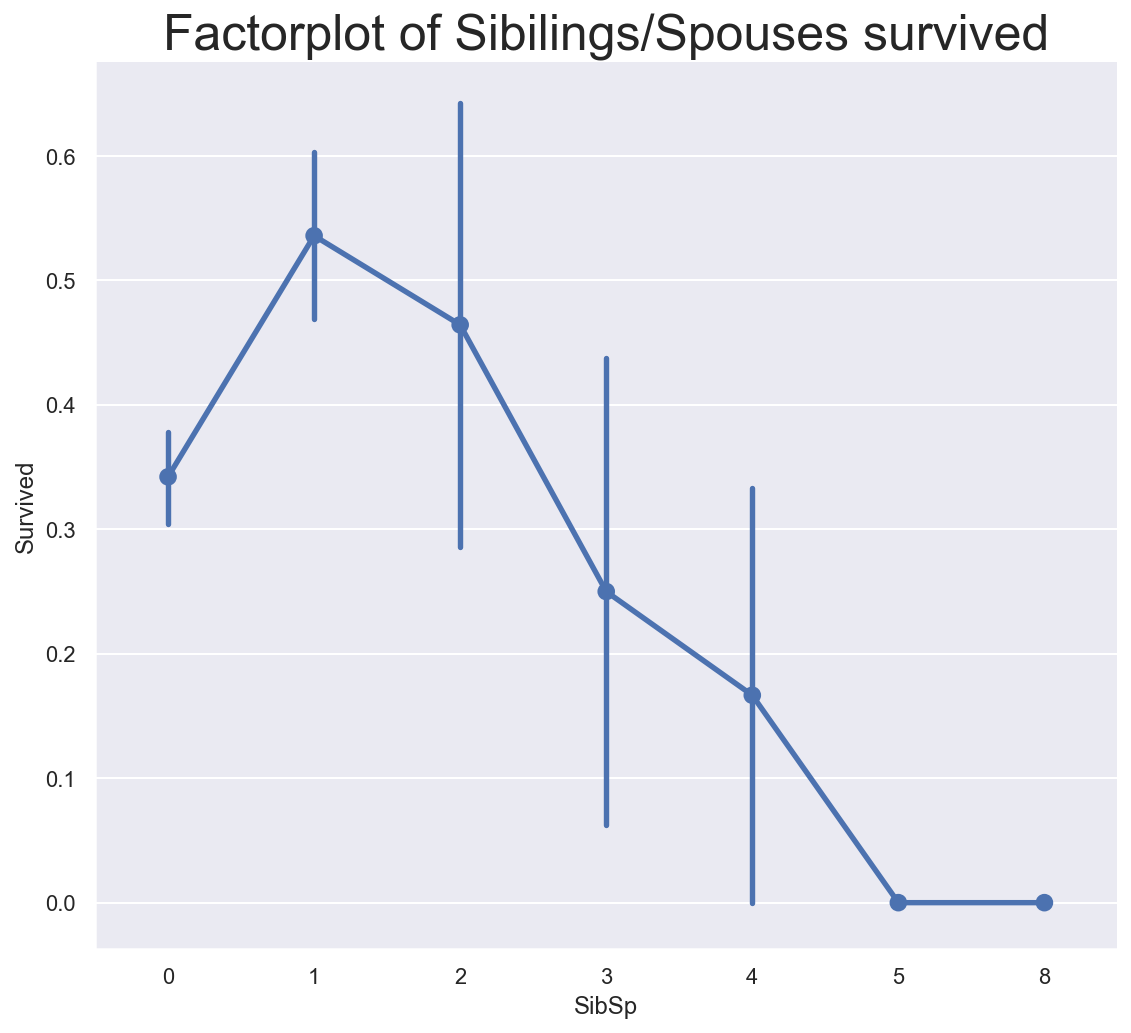

In [42]:
sns.factorplot(x =  "SibSp", y = "Survived", data = train,kind = "point",size = 8)
plt.title('Factorplot of Sibilings/Spouses survived', fontsize = 25)
plt.subplots_adjust(top=0.85)

In [43]:
#placing 0 for female and 1 for male
train['Sex'] = train.Sex.apply(lambda x:0 if x == "female" else 1)
test['Sex'] = test.Sex.apply(lambda x:0 if x == "female" else 1)

In [44]:
train.describe()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
count,888.000000,888.000000,888.000000,711.000000,888.000000,888.000000,888.000000,888.000000
mean,445.618243,2.313063,0.647523,29.675345,0.524775,0.381757,30.582164,0.381757
std,257.405474,0.834007,0.478011,14.552495,1.104186,0.806949,41.176366,0.486091
min,1.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,222.750000,2.000000,0.000000,20.000000,0.000000,0.000000,7.895800,0.000000
50%,445.500000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,667.250000,3.000000,1.000000,38.000000,1.000000,0.000000,30.771850,1.000000
max,891.000000,3.000000,1.000000,80.000000,8.000000,6.000000,263.000000,1.000000


In [45]:
test.describe()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,0.636364,30.272590,0.447368,0.392344,35.572384
std,120.810458,0.841838,0.481622,14.181209,0.896760,0.981429,55.851741
min,892.000000,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,0.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,1.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,1.000000,39.000000,1.000000,0.000000,31.471875
max,1309.000000,3.000000,1.000000,76.000000,8.000000,9.000000,512.329200


In [46]:
train.describe(include=['object'])

,Name,Ticket,Cabin,Embarked
count,888,888,888,888
unique,888,680,8,3
top,"Braund, Mr. Owen Harris",347082,G,S
freq,1,7,464,644


In [47]:
#overview survived vs non-survived
survived_summary = train.groupby("Survived")
survived_summary.mean().reset_index()

,Survived,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,447.016393,2.531876,0.852459,30.626179,0.553734,0.329690,22.117887
1,1,443.353982,1.958702,0.315634,28.270627,0.477876,0.466077,44.289799


In [48]:
survived_summary = train.groupby("Sex")
survived_summary.mean().reset_index()

,Sex,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
0,0,431.578275,2.162939,27.888462,0.696486,0.651757,42.985091,0.741214
1,1,453.260870,2.394783,30.705477,0.431304,0.234783,23.830658,0.186087


In [49]:
survived_summary = train.groupby("Pclass")
survived_summary.mean().reset_index()

,Pclass,PassengerId,Sex,Age,SibSp,Parch,Fare,Survived
0,1,460.225352,0.563380,38.280984,0.422535,0.356808,78.124061,0.624413
1,2,445.956522,0.586957,29.877630,0.402174,0.380435,20.662183,0.472826
2,3,439.154786,0.706721,25.140620,0.615071,0.393075,13.675550,0.242363


In [50]:
#get the most important variable
corr = train.corr()**2
corr.Survived.sort_values(ascending = False)
np.shape(train.corr())

(8, 8)

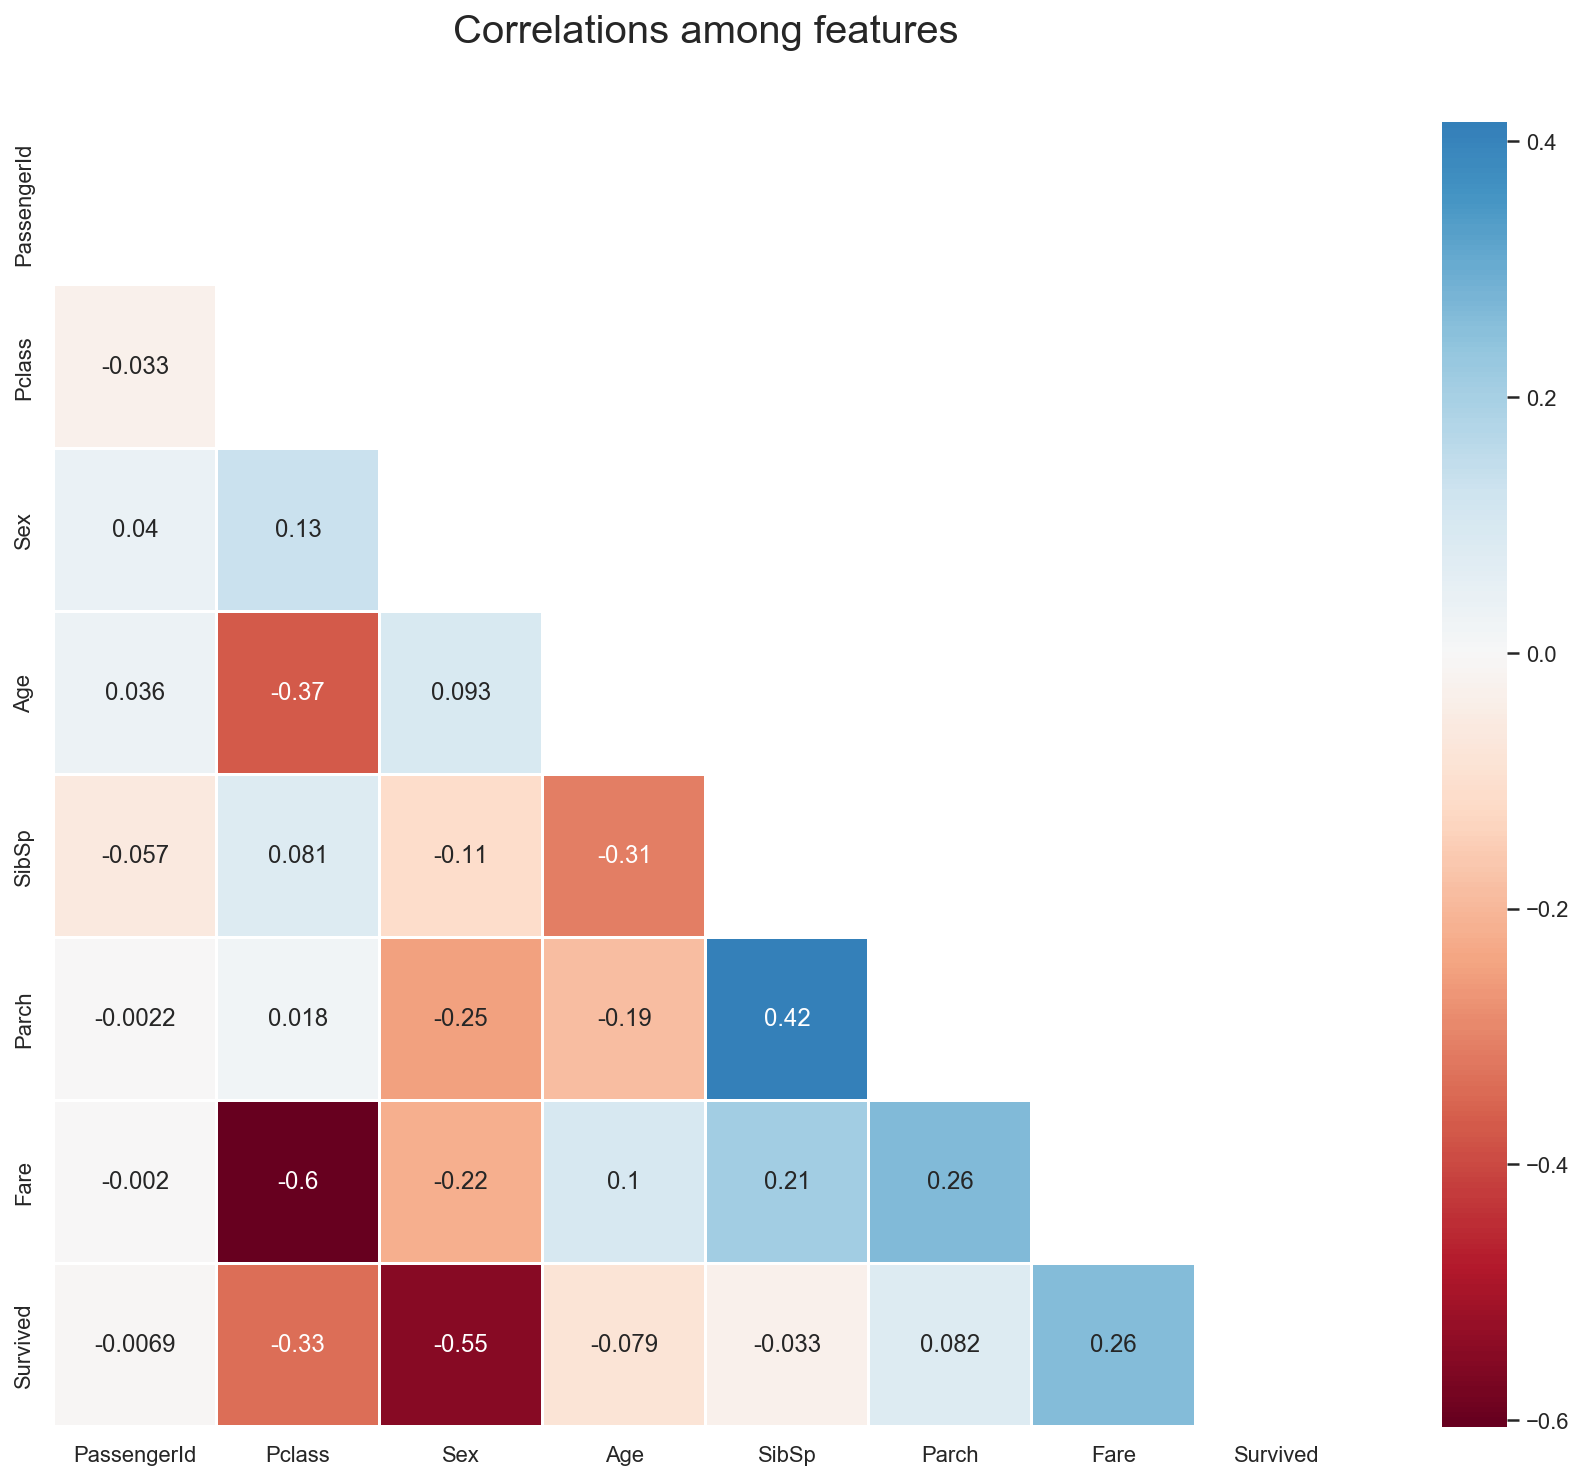

In [51]:
#heatmap to generate correlation between features
#generate a mask for upper triangle
import numpy as np
mask = np.zeros_like(train.corr(), dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
sns.set_style('whitegrid')
plt.subplots(figsize=(15,12))
sns.heatmap(train.corr(),
            annot = True,
            mask = mask,
            cmap = 'RdBu',
            linewidth = 0.9,
            linecolor = 'white',
            fmt='.2g',
            center = 0,
            square = True           
           )
plt.title("Correlations among features", y=1.03, fontsize=20, pad=40);

In [52]:
male_mean = train[train["Sex"]==1].Survived.mean()
female_mean = train[train["Sex"]==0].Survived.mean()

print("Male survival mean " +str(male_mean))
print("Female survival mean " +str(female_mean))
print("The difference between mean survival " +str(female_mean-male_mean))

Male survival mean 0.18608695652173912
Female survival mean 0.7412140575079872
The difference between mean survival 0.5551271009862481


In [53]:
#separating male and feamle dataframe
import random
male = train[train["Sex"] == 1]
female = train[train["Sex"] == 0]

##empty list for storing mean sample
m_mean_samples = []
f_mean_samples = []

for i in range(50):
    m_mean_samples.append(np.mean(random.sample(list(male['Survived']),50)))
    f_mean_samples.append(np.mean(random.sample(list(female['Survived']),50)))
    
print("Male sample mean :" +str(round(np.mean(m_mean_samples),2)))
print("Female sample mean :" +str(round(np.mean(f_mean_samples),2)))


Male sample mean :0.18
Female sample mean :0.76


In [54]:
#Feature Engineering

#length of names
#creating a new feature name_length that will take count of each name's letters
train['name_length'] = [len(i) for i in train.Name]
test['name_length'] = [len(i) for i in test.Name]

def name_length_group(size):
    a = ''
    if (size<=20):
        a = 'short'
    elif (size<=35):
        a = 'medium'
    elif (size<=45):
        a = 'good'
    else:
        a = 'long'
    return a 

train['nLength_group'] = train['name_length'].map(name_length_group)
test['nLength_group'] = test['name_length'].map(name_length_group)

In [55]:
#getting title from names
#title is after a ',' and a '.'
train["title"] = [i.split('.')[0] for i in train.Name]
train["title"] = [i.split(',')[1] for i in train.title]

test["title"] = [i.split('.')[0] for i in test.Name]
test["title"] = [i.split(',')[1] for i in test.title]

In [56]:
#lets check for white space
print(train.title.unique())
print(test.title.unique())

[' Mr' ' Mrs' ' Miss' ' Master' ' Don' ' Rev' ' Dr' ' Mme' ' Ms' ' Major'
 ' Lady' ' Sir' ' Mlle' ' Col' ' Capt' ' the Countess' ' Jonkheer']
[' Mr' ' Mrs' ' Miss' ' Master' ' Ms' ' Col' ' Rev' ' Dr' ' Dona']


In [57]:
#lets fix white space
train.title = train.title.apply(lambda x:x.strip( ))
test.title = test.title.apply(lambda x:x.strip( ))

In [58]:
#replacing some rare titles with the word "rare" and some other titles with titles of our liking 
#train data

train["title"] = [i.replace('Ms','Miss') for i in train.title]
train["title"] = [i.replace('Mlle','Miss') for i in train.title] #mlle is mademoiselle 
train["title"] = [i.replace('Mme','Mrs') for i in train.title] #mme is madame

#next are all rare so lets just write a function

def name_converted(feature):
    """
    this feature helps convert titles
    """
    
    result = ''
    if feature in ['the Countess', 'Jonkheer', 'Capt', 'Dona', 'Col', 'Lady', 'Sir', 'Major', 'Rev', 'Don', 'Dr']:
        result = 'rare'
    elif feature in ['Ms', 'Mlle']:
        result = 'Miss'
    elif feature in ['Mme']:
        result = 'Mrs'
    else:
        result = feature
    
    return result

train.title = train.title.map(name_converted)
test.title = test.title.map(name_converted)


In [59]:
print(train.title.unique())
print(test.title.unique())

['Mr' 'Mrs' 'Miss' 'Master' 'rare']
['Mr' 'Mrs' 'Miss' 'Master' 'rare']


In [60]:
'''
creating family size feature
'''

train['family_size'] = train.Parch + train.SibSp + 1 
test['family_size'] = test.Parch + test.SibSp + 1

print(train.family_size.unique())
print(test.family_size.unique())

[ 2  1  5  3  7  6  4  8 11]
[ 1  2  3  5  4  6  8  7 11]


In [61]:
#binning family size
def family_group(size):
    """
    This function groups families into loner small large based on family size 
    """
    
    a = ''
    if (size<=1):
        a = 'loner'
    elif (size<=4):
        a = 'small'
    else:
        a = 'large'
    
    return a       

In [62]:
#apply family_group to modify family_group feature
train['family_group'] = train.family_size.map(family_group) 
test['family_group'] = test.family_size.map(family_group)

In [63]:
"""
new feature named is_alone
"""
train["is_alone"] = [1 if i<2 else 0 for i in train.family_size]
test["is_alone"] = [1 if i<2 else 0 for i in test.family_size]

In [64]:
train.Ticket.value_counts().sample(10)

#i don't know how to engineer ticket feature for now

350034               1
65303                1
W.E.P. 5734          1
11668                2
335097               1
2926                 1
PC 17596             1
SOTON/O.Q. 392087    1
345763               1
345765               1
Name: Ticket, dtype: int64

In [65]:
train.drop(["Ticket"], axis=1, inplace=True)
test.drop(["Ticket"], axis=1, inplace=True)

In [66]:
#calculating fare from family size
train["calculated_fare"] = train.Fare/train.family_size
test["calculated_fare"] = test.Fare/test.family_size


In [67]:
def fare_group(fare):
    '''
    this function creates a fare group based on the calculated fare
    '''
    
    a = ''
    if fare<=4:
        a = 'very_low'
    elif fare<=10:
        a = 'low'
    elif fare<=20:
        a = 'mid'
    elif fare<=45:
        a = 'high'
    else:
        a = 'very_high'
        
    return a

train['fare_group'] = train.calculated_fare.map(fare_group)
test['fare_group'] = test.calculated_fare.map(fare_group)
            

In [68]:
'''
dropping PassengerId
'''

train.drop(['PassengerId'], axis=1, inplace=True)
test.drop(['PassengerId'], axis=1, inplace=True)

In [69]:
#getting dummy vairables

train = pd.get_dummies(train, columns= ['title', 'Pclass', 'Embarked', 'Cabin', 'nLength_group', 'family_group', 'fare_group'])
test = pd.get_dummies(test, columns= ['title', 'Pclass', 'Embarked', 'Cabin', 'nLength_group', 'family_group', 'fare_group'])
train.drop(['Name', 'family_size', 'name_length', 'Fare'], axis=1, inplace=True)
test.drop(['Name', 'family_size', 'name_length', 'Fare'], axis=1, inplace=True)

In [70]:
## rearranging the columns so that 
#I can easily use the dataframe to predict the missing age values. 
train = pd.concat([train[["Survived", "Age", "Sex","SibSp","Parch"]], train.loc[:,"is_alone":]], axis=1)
test = pd.concat([test[["Age", "Sex"]], test.loc[:,"SibSp":]], axis=1)

In [71]:
#importing randomforestregressor

from sklearn.ensemble import RandomForestRegressor

#writing a function that takes a dataframe with missing values as input
#outputs the dataframe with the missing values filled

def completing_age(df):
    #getting all features except survived stats
    age_df =  df.loc[:,"Age":]
    
    temp_train = age_df.loc[age_df.Age.notnull()] #df with missing values
    temp_test = age_df.loc[age_df.Age.isnull()] #df with values available
    
    y = temp_train.Age.values #setting target variables for y axis
    x = temp_train.loc[:,"Sex":].values
    
    rfr = RandomForestRegressor(n_estimators=1500, n_jobs=-1)
    rfr.fit(x,y)
    
    predicted_age = rfr.predict(temp_test.loc[:, "Sex":])
    
    df.loc[df.Age.isnull(), 'Age'] = predicted_age
    
    return df
    
completing_age(train)
completing_age(test);
    

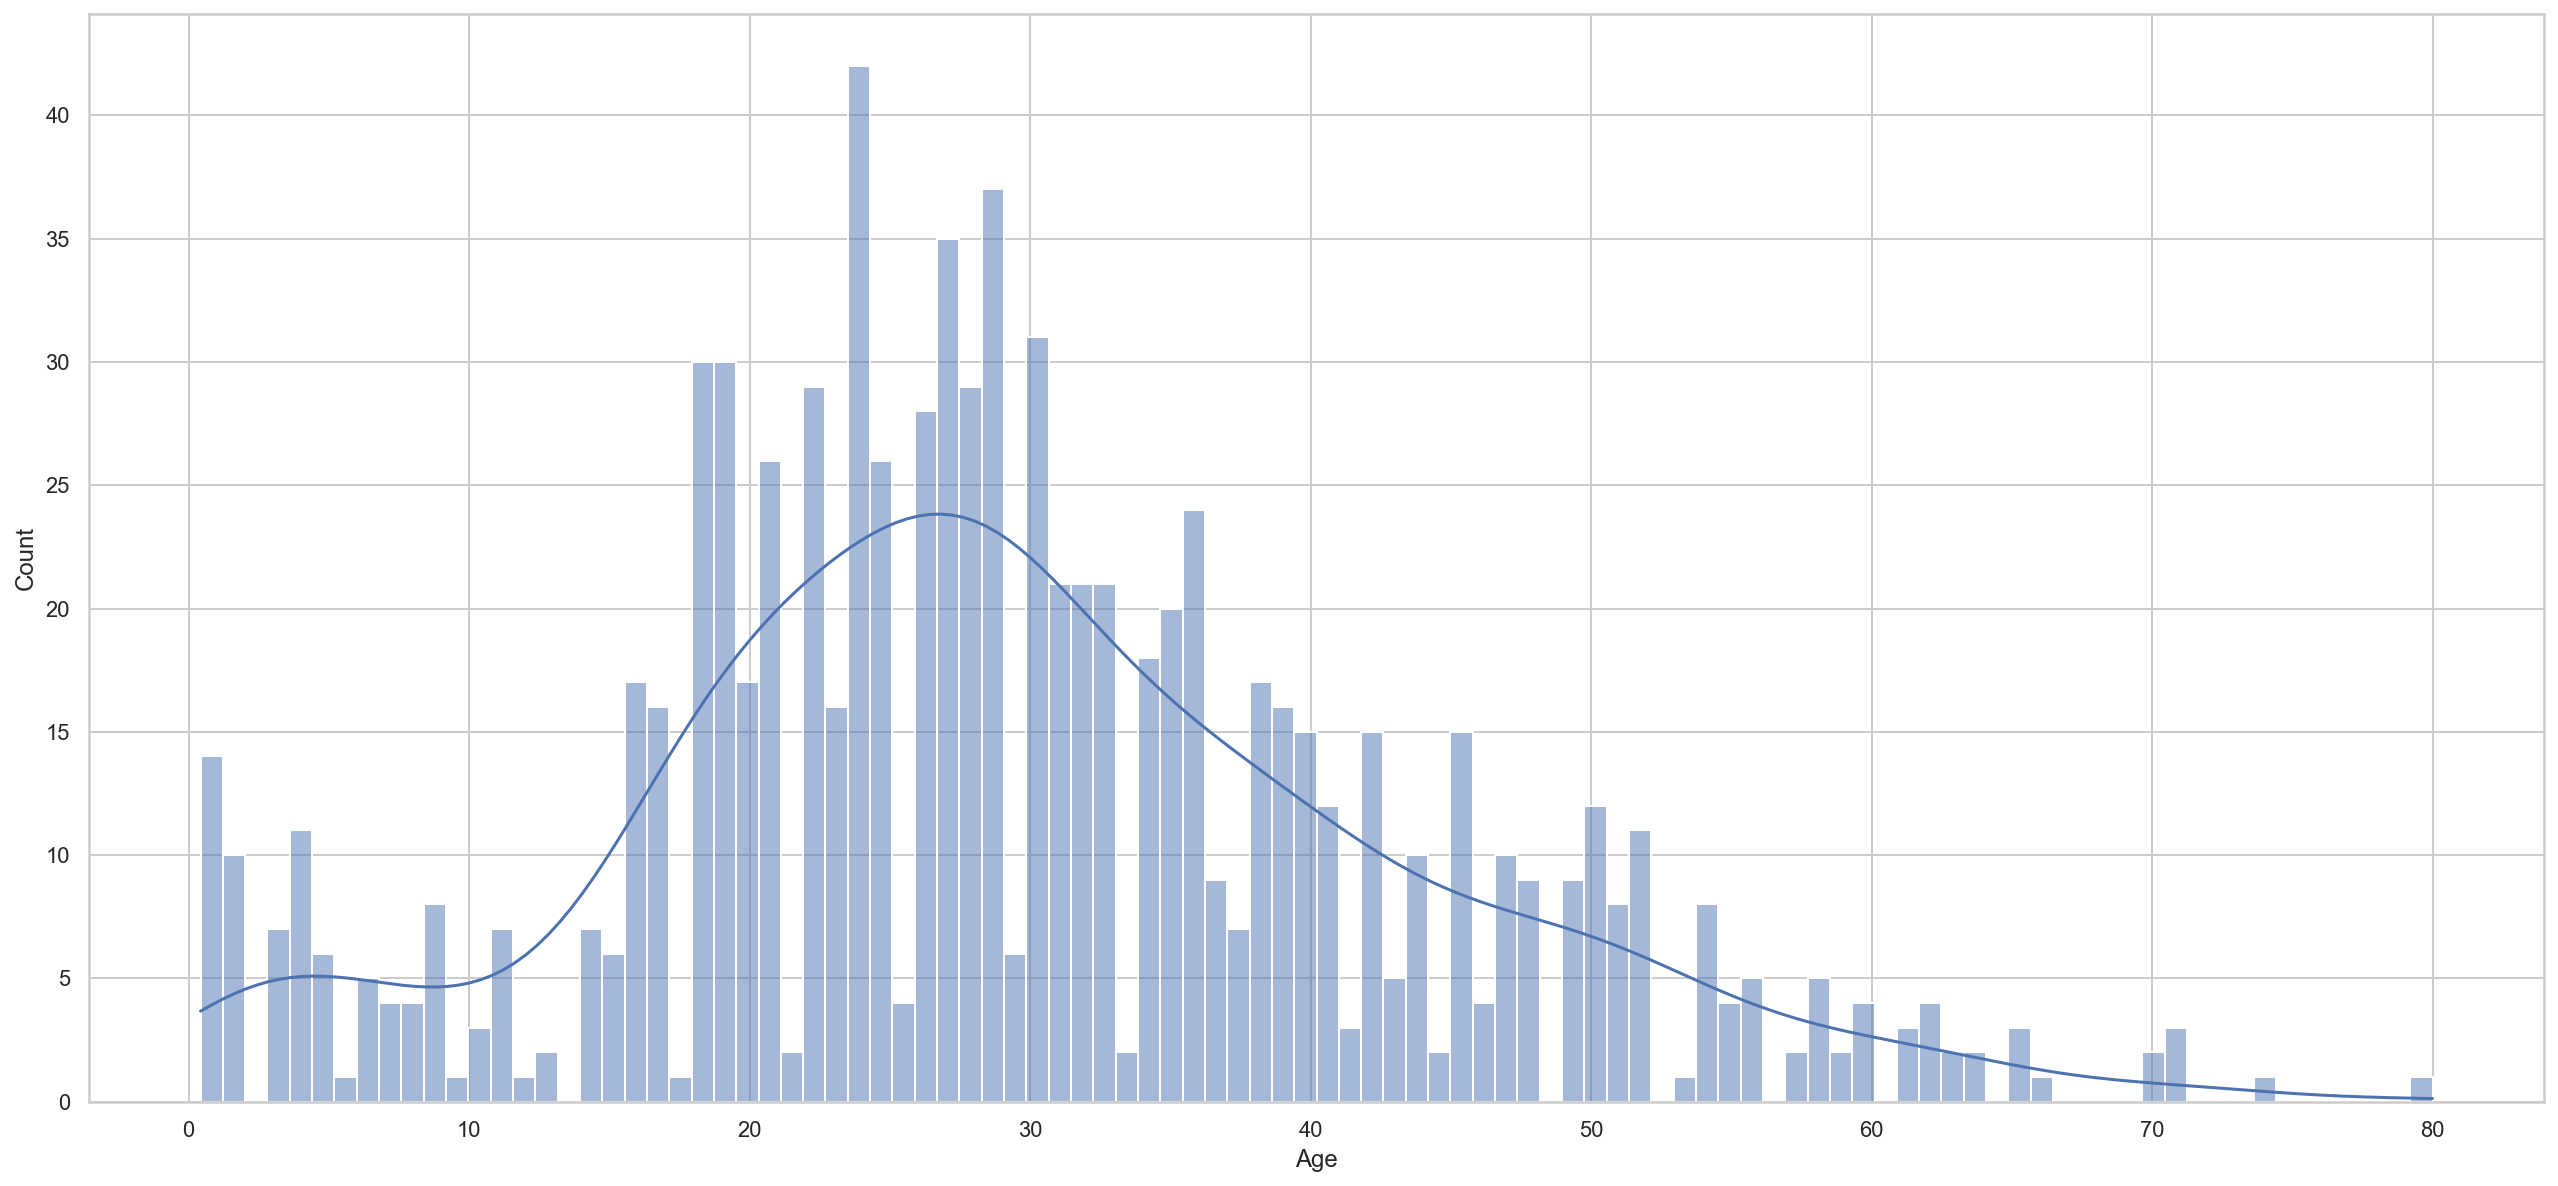

In [72]:
## Let's look at the age histogram

plt.subplots(figsize = (22,10))
sns.histplot(train.Age, bins = 100, kde = True);

In [73]:
##creating bins for age
def age_group_for_fun(age):
    
    """
    This function creates a bin for age 
    """
    
    a = ''
    if age<=1:
        a = "infant";
    elif age<=4:
        a = "toddler";
    elif age<=13:
        a = "child";
    elif age<=18:
        a = "teenager";
    elif age<=35:
        a = "young_adult";
    elif age<=45:
        a = "adult";
    elif age<=55:
        a = "middle_aged";
    elif age<=65:
        a = "senior_citizen";
    else:
        a = "old";
    return a

#applying the function to the "Age" column
train["age_group"] = train.Age.map(age_group_for_fun)
test["age_group"] = test.Age.map(age_group_for_fun)

#creating dummies for age_group variable
train = pd.get_dummies(train, columns=["age_group"], drop_first=True)
test = pd.get_dummies(test, columns=["age_group"], drop_first=True)
            

In [74]:
#separating independent and dependent variables
X = train.drop(['Survived'], axis = 1)
y = train["Survived"]

In [75]:
#splitting training data for cross-validation

"""
using 2/3rd of training data to train our model
"""

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=69)

In [76]:
len(X_train)

594

In [77]:
len(X_test)

294

In [78]:
train.sample(5)

,Survived,Age,Sex,SibSp,Parch,is_alone,calculated_fare,title_Master,title_Miss,title_Mr,...,fare_group_very_high,fare_group_very_low,age_group_child,age_group_infant,age_group_middle_aged,age_group_old,age_group_senior_citizen,age_group_teenager,age_group_toddler,age_group_young_adult
124,0,54.0,1,0,1,0,38.643750,0,0,1,...,0,0,0,0,1,0,0,0,0,0
540,1,36.0,0,0,2,0,23.666667,0,1,0,...,0,0,0,0,0,0,0,0,0,0
754,1,48.0,0,1,2,0,16.250000,0,0,0,...,0,0,0,0,1,0,0,0,0,0
183,1,1.0,1,2,1,0,9.750000,1,0,0,...,0,0,0,1,0,0,0,0,0,0
544,0,50.0,1,1,0,0,53.212500,0,0,1,...,1,0,0,0,1,0,0,0,0,0


In [79]:
#we need to do feature scaling for models those use euclidian distance
#specially for age and calculated fare 
#cause they have higher values while other variables
#they got lower values compared to those (like 0 or 1)

In [80]:
"""
I will be using standardization method instead of 
normalization because human data usually
have a normal/gausian distribution
"""

'\nI will be using standardization method instead of \nnormalization because human data usually\nhave a normal/gausian distribution\n'

In [81]:
##lets see some training data before scaling
headers = X_train.columns
X_train.head()

,Age,Sex,SibSp,Parch,is_alone,calculated_fare,title_Master,title_Miss,title_Mr,title_Mrs,...,fare_group_very_high,fare_group_very_low,age_group_child,age_group_infant,age_group_middle_aged,age_group_old,age_group_senior_citizen,age_group_teenager,age_group_toddler,age_group_young_adult
646,19.00000,1,0,0,1,7.8958,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
739,27.34729,1,0,0,1,7.8958,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
676,24.50000,1,0,0,1,8.0500,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
422,29.00000,1,0,0,1,7.8750,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
461,34.00000,1,0,0,1,8.0500,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [82]:
## Feature scaling

from sklearn.preprocessing import StandardScaler
st_scale = StandardScaler()

#transforming X_train and X_test
X_train = st_scale.fit_transform(X_train)
X_test = st_scale.transform(X_test)


In [83]:
##the same above data after scaling
pd.DataFrame(X_train, columns=headers).head()

,Age,Sex,SibSp,Parch,is_alone,calculated_fare,title_Master,title_Miss,title_Mr,title_Mrs,...,fare_group_very_high,fare_group_very_low,age_group_child,age_group_infant,age_group_middle_aged,age_group_old,age_group_senior_citizen,age_group_teenager,age_group_toddler,age_group_young_adult
0,-0.779832,0.758681,-0.507484,-0.458395,0.806226,-0.413597,-0.205196,-0.524097,0.85544,-0.41145,...,-0.289727,-0.21395,-0.234653,-0.124035,-0.312996,-0.101015,-0.209611,-0.272289,-0.171647,0.957146
1,-0.190381,0.758681,-0.507484,-0.458395,0.806226,-0.413597,-0.205196,-0.524097,0.85544,-0.41145,...,-0.289727,-0.21395,-0.234653,-0.124035,-0.312996,-0.101015,-0.209611,-0.272289,-0.171647,0.957146
2,-0.391445,0.758681,-0.507484,-0.458395,0.806226,-0.407181,-0.205196,-0.524097,0.85544,-0.41145,...,-0.289727,-0.21395,-0.234653,-0.124035,-0.312996,-0.101015,-0.209611,-0.272289,-0.171647,0.957146
3,-0.073673,0.758681,-0.507484,-0.458395,0.806226,-0.414462,-0.205196,-0.524097,0.85544,-0.41145,...,-0.289727,-0.21395,-0.234653,-0.124035,-0.312996,-0.101015,-0.209611,-0.272289,-0.171647,0.957146
4,0.279406,0.758681,-0.507484,-0.458395,0.806226,-0.407181,-0.205196,-0.524097,0.85544,-0.41145,...,-0.289727,-0.21395,-0.234653,-0.124035,-0.312996,-0.101015,-0.209611,-0.272289,-0.171647,0.957146


In [84]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold, StratifiedShuffleSplit
from sklearn.metrics import accuracy_score

In [85]:
"""
I am using decision tree classifier as my first model
"""

from sklearn.tree import DecisionTreeClassifier
max_depth = range(1,30)
max_feature = [21,22,23,24,25,26,27,28,29,30,'auto']
criterion = ['gini','entropy']

param = {"max_depth": max_depth,
        "max_features": max_feature,
        "criterion": criterion}

grid = GridSearchCV(DecisionTreeClassifier(),
                   param_grid = param,
                   verbose = False,
                   cv = StratifiedKFold(n_splits=20, random_state=15, shuffle=True),
                   n_jobs = -1)
grid.fit(X,y)



GridSearchCV(cv=StratifiedKFold(n_splits=20, random_state=15, shuffle=True),
             estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30),
                         'max_features': [21, 22, 23, 24, 25, 26, 27, 28, 29,
                                          30, 'auto']},
             verbose=False)

In [86]:
##getting the best of all

print(grid.best_estimator_)
print(grid.best_params_)
print(grid.best_score_)

DecisionTreeClassifier(max_depth=5, max_features=25)
{'criterion': 'gini', 'max_depth': 5, 'max_features': 25}
0.8313383838383841


In [87]:
DecisionTree_grid = grid.best_estimator_
DecisionTree_grid.score(X,y)

0.8490990990990991

In [88]:
## checking feature importance ranked by decision tree classifier
column_names = X.columns
print(column_names)

feature_importances = pd.DataFrame (DecisionTree_grid.feature_importances_,
                                   index = column_names,
                                   columns = ["importance"])

feature_importances.sort_values(by = 'importance', ascending = False).head(10)

Index(['Age', 'Sex', 'SibSp', 'Parch', 'is_alone', 'calculated_fare',
       'title_Master', 'title_Miss', 'title_Mr', 'title_Mrs', 'title_rare',
       'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E',
       'Cabin_F', 'Cabin_G', 'Cabin_T', 'nLength_group_good',
       'nLength_group_long', 'nLength_group_medium', 'nLength_group_short',
       'family_group_large', 'family_group_loner', 'family_group_small',
       'fare_group_high', 'fare_group_low', 'fare_group_mid',
       'fare_group_very_high', 'fare_group_very_low', 'age_group_child',
       'age_group_infant', 'age_group_middle_aged', 'age_group_old',
       'age_group_senior_citizen', 'age_group_teenager', 'age_group_toddler',
       'age_group_young_adult'],
      dtype='object')


,importance
title_Mr,0.562631
family_group_large,0.130475
Pclass_3,0.051915
title_rare,0.047639
Cabin_G,0.043986
fare_group_high,0.038229
calculated_fare,0.025267
Pclass_1,0.024808
Age,0.023345
Pclass_2,0.015749


In [89]:
"""
I am using Random Forest Classifier as my second model
"""

from sklearn.ensemble import RandomForestClassifier
n_estimators = [120, 125, 130, 135, 140, 150, 160];
max_depth = range(1,10)
criterions = ['gini', 'entropy']

cv = StratifiedShuffleSplit(n_splits=10, train_size=0.30, random_state=10)

parameters = {'n_estimators': n_estimators,
             'max_depth': max_depth,
             'criterion': criterions}

grid = GridSearchCV(estimator= RandomForestClassifier(max_features='auto'),
                  param_grid= parameters,
                  cv=cv,
                  n_jobs=-1)

grid.fit(X,y)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=10, test_size=None,
            train_size=0.3),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'n_estimators': [120, 125, 130, 135, 140, 150, 160]})

In [90]:
print(grid.best_score_)
print(grid.best_estimator_)
print(grid.best_params_)

0.8162379421221864
RandomForestClassifier(max_depth=5, n_estimators=125)
{'criterion': 'gini', 'max_depth': 5, 'n_estimators': 125}


In [91]:
RandomForest_grid = grid.best_estimator_
RandomForest_grid.score(X,y)

0.8536036036036037

In [92]:
"""
I am using Bagging Classifier as my third model
"""

from sklearn.ensemble import BaggingClassifier 
n_estimators = [10,30,50,70,90,100,120,130,150,170,180,165,190]
cv = StratifiedShuffleSplit(n_splits=10, test_size=0.30, random_state=15)

parameters = {"n_estimators": n_estimators
             }

grid = GridSearchCV(BaggingClassifier(base_estimator= None, #if None, the base is a decision tree estimator
                                    bootstrap_features=False),
                   param_grid= parameters,
                   cv=cv,
                   n_jobs=-1)

grid.fit(X,y)


GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=15, test_size=0.3,
            train_size=None),
             estimator=BaggingClassifier(), n_jobs=-1,
             param_grid={'n_estimators': [10, 30, 50, 70, 90, 100, 120, 130,
                                          150, 170, 180, 165, 190]})

In [93]:
print(grid.best_score_)
print(grid.best_estimator_)
print(grid.best_params_)

0.8164794007490637
BaggingClassifier(n_estimators=130)
{'n_estimators': 130}


In [94]:
Bagging_grid = grid.best_estimator_
Bagging_grid.score(X,y)

0.9887387387387387

In [95]:
"""
I am gonna use adaboosting as my third ml model
"""

from sklearn.ensemble import AdaBoostClassifier
n_estimators = [100,120,140,150,160,165,170,175,180,185,190]
cv = StratifiedShuffleSplit (n_splits=10, test_size=0.3, random_state=15)
learning_r = [0.1,0.01,0.05,0.5]

parameters = {"n_estimators": n_estimators,
             "learning_rate": learning_r}

grid = GridSearchCV(AdaBoostClassifier(base_estimator= None),
                                      param_grid = parameters,
                   cv=cv, n_jobs=-1)

grid.fit(X,y)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=15, test_size=0.3,
            train_size=None),
             estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.05, 0.5],
                         'n_estimators': [100, 120, 140, 150, 160, 165, 170,
                                          175, 180, 185, 190]})

In [96]:
print(grid.best_score_)
print(grid.best_estimator_)
print(grid.best_params_)

0.8295880149812733
AdaBoostClassifier(learning_rate=0.05, n_estimators=190)
{'learning_rate': 0.05, 'n_estimators': 190}


In [97]:
AdaBoost_grid = grid.best_estimator_
AdaBoost_grid.score(X,y)

0.8344594594594594

In [103]:
# from sklearn.datasets import load_iris
# >>> from sklearn.ensemble import RandomForestClassifier
# >>> from sklearn.svm import LinearSVC
# >>> from sklearn.linear_model import LogisticRegression
# >>> from sklearn.preprocessing import StandardScaler
# >>> from sklearn.pipeline import make_pipeline
# >>> from sklearn.ensemble import StackingClassifier
# >>> X, y = load_iris(return_X_y=True)
# >>> estimators = [
# ...     ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
# ...     ('svr', make_pipeline(StandardScaler(),
# ...                           LinearSVC(random_state=42)))
# ... ]
# >>> clf = StackingClassifier(
# ...     estimators=estimators, final_estimator=LogisticRegression()
# ... )
# >>> from sklearn.model_selection import train_test_split
# >>> X_train, X_test, y_train, y_test = train_test_split(
# ...     X, y, stratify=y, random_state=42
# ... )
# >>> clf.fit(X_train, y_train).score(X_test, y_test)

from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
estimators = [
    ('rf', RandomForestClassifier(criterion='entropy', max_depth=6, n_estimators=130)),
    ('abc', AdaBoostClassifier(learning_rate=0.05, n_estimators=190)),
    ('bc', BaggingClassifier(n_estimators=170)),
    ('dt', DecisionTreeClassifier(criterion='entropy', max_depth=6, max_features=29))   
]

clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

clf.fit(X,y).score(X_test,y_test)


0.8333333333333334

In [97]:
# from sklearn.ensemble import VotingClassifier

# ensemble_model = VotingClassifier(estimators=[
#     ("bagging", Bagging_grid),
#     ("adaboost", AdaBoost_grid),
#     ("rf", RandomForest_grid),
#     ("dt", DecisionTree_grid),
# ], voting = "hard")

In [98]:
# ensemble_model.fit(X,y)

In [99]:
# ensemble_model.score(X,y)

In [100]:
# output = pd.DataFrame({'PassengerId': passengerid,
#                        'Survived': test_prediction})

# output.PassengerId = output.PassengerId.astype(int)
# output.Survived = output.Survived.astype(int)

# output.to_csv('submission.csv', index=False)

In [100]:
## submit test prediction

# my_models = {Bagging_grid,
#              AdaBoost_grid,
#             RandomForest_grid,
#             DecisionTree_grid}

my_models = {clf}

c = {}
for i in my_models:
    a = i.predict(X_test)
    b = accuracy_score(a, y_test)
    c[i] = b

In [101]:
test_prediction = (max(c, key=c.get)).predict(test)
submission = pd.DataFrame({
    "PassengerId": passengerid,
    "Survived": test_prediction
})

submission.PassengerId = submission.PassengerId.astype(int)
submission.Survived = submission.Survived.astype(int)

submission.to_csv("submission.csv", index = False)